In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import abus_classification

In [9]:
tdsc = abus_classification.datasets.TDSCTumors(path="../data/tdsc")

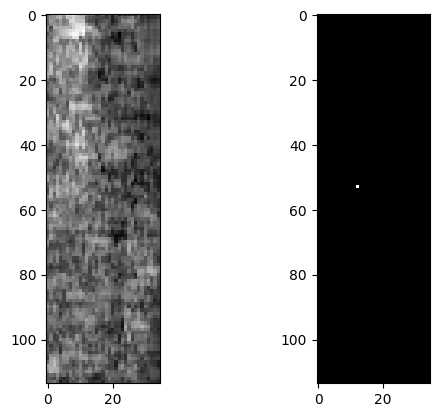

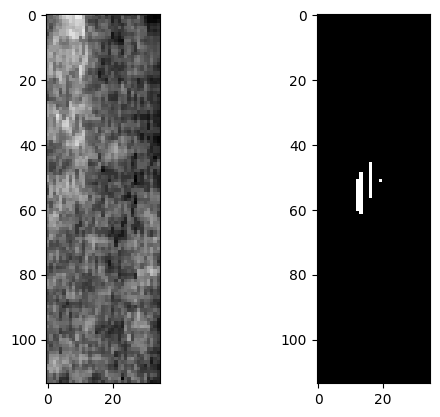

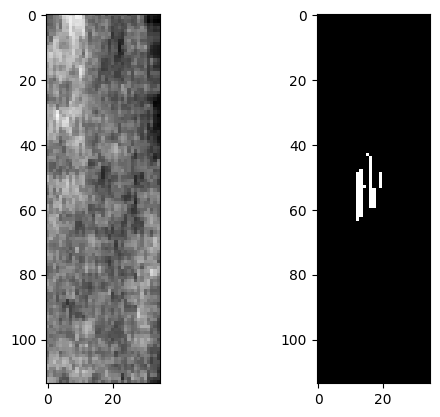

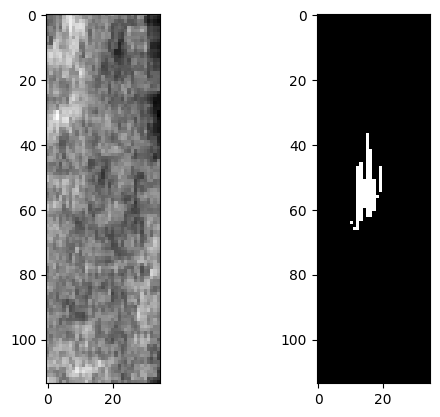

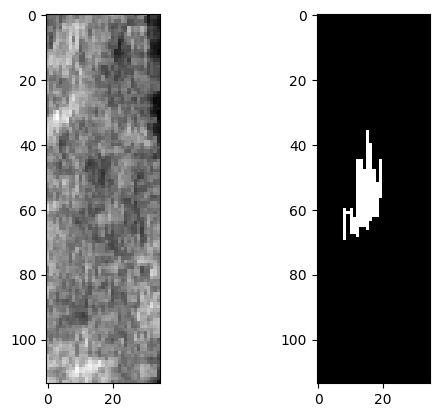

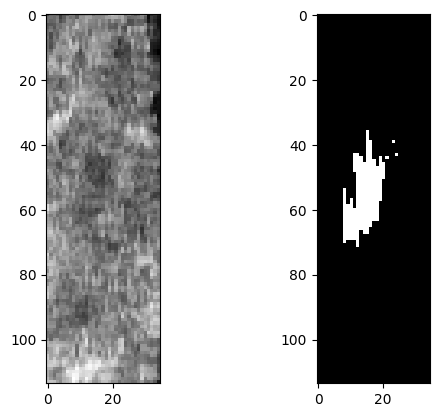

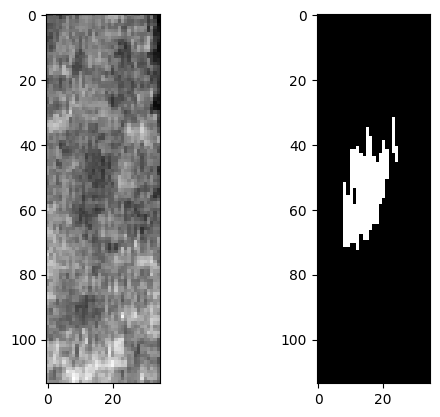

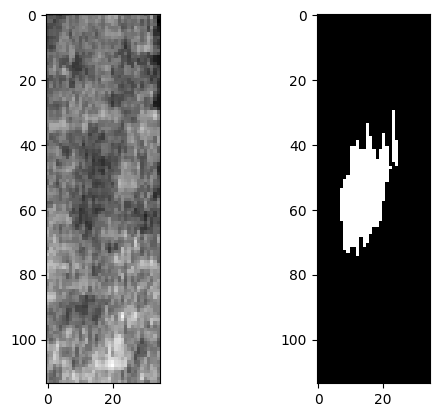

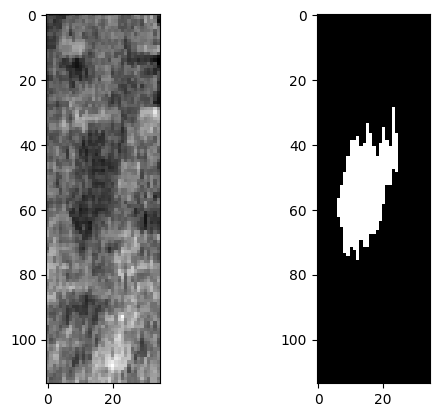

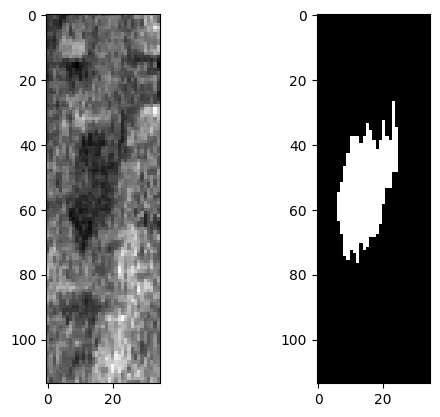

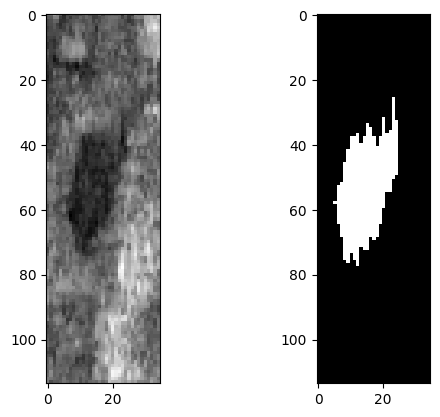

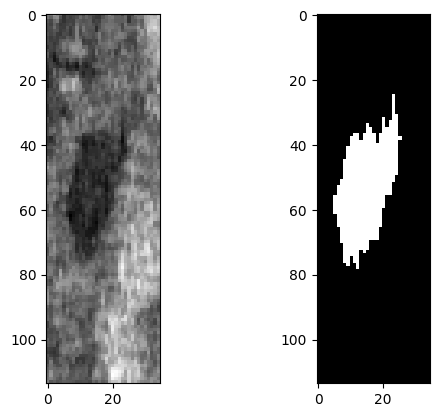

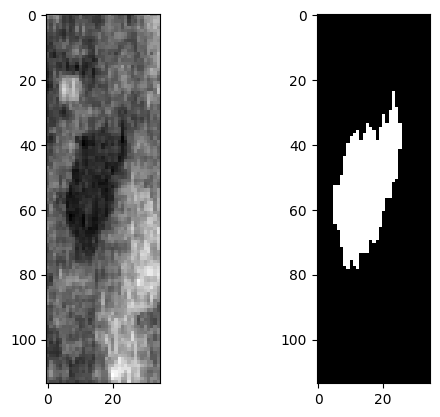

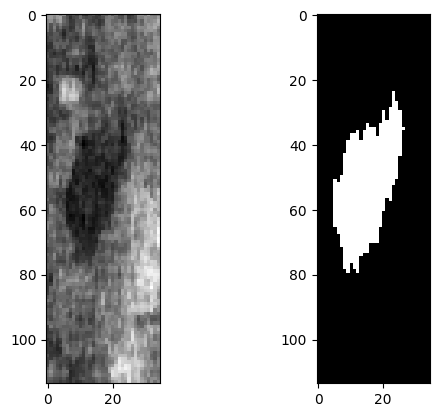

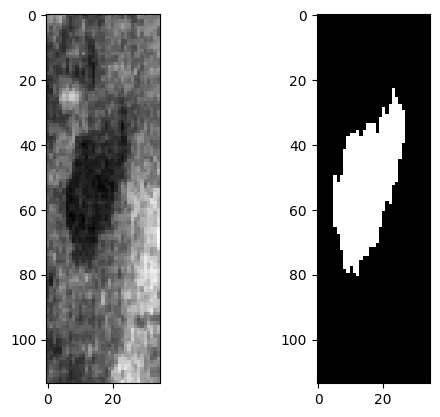

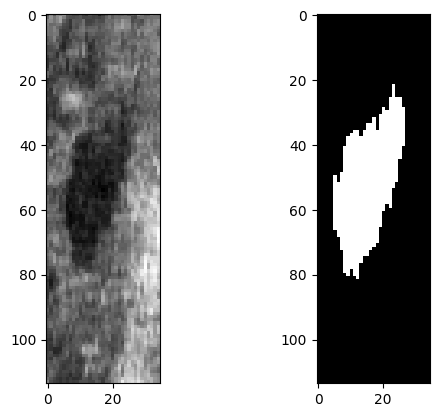

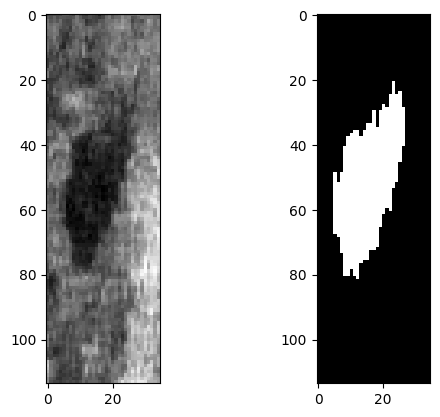

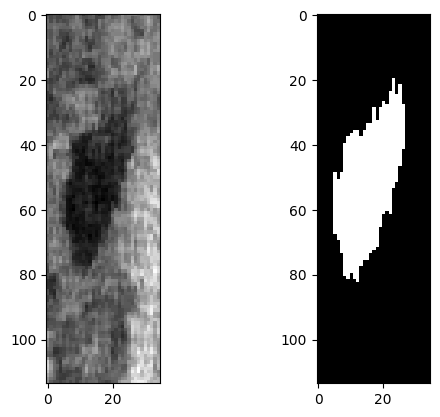

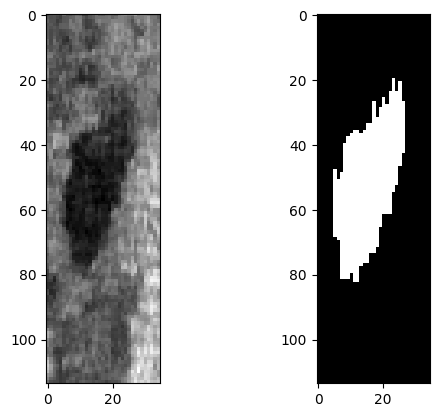

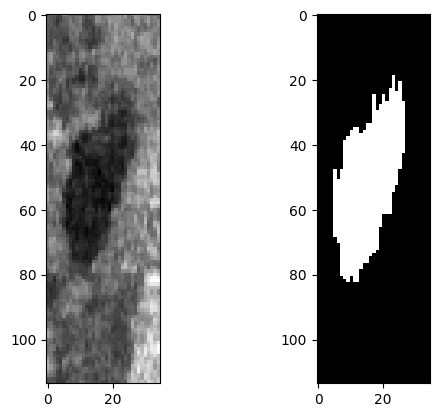

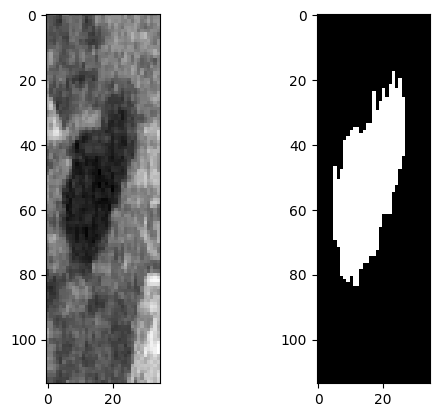

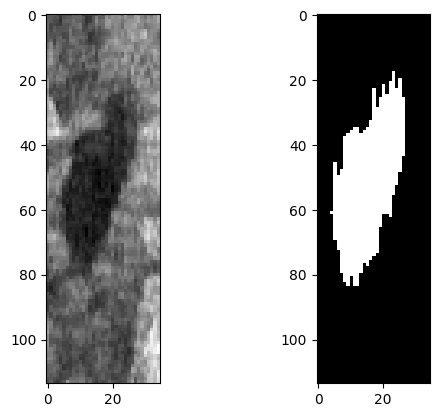

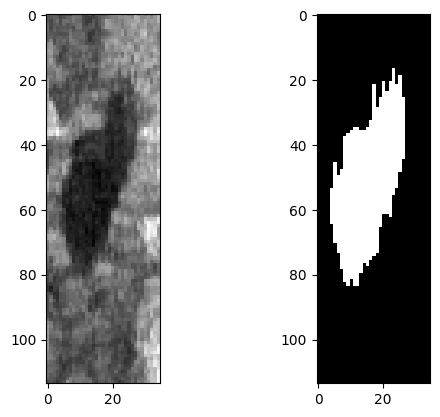

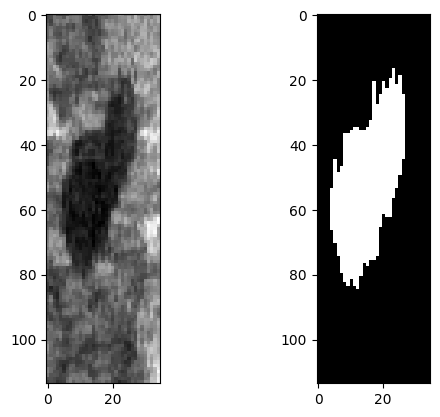

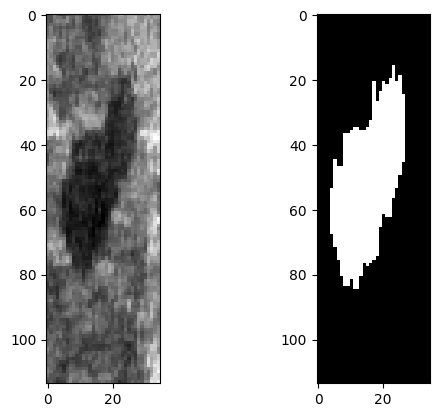

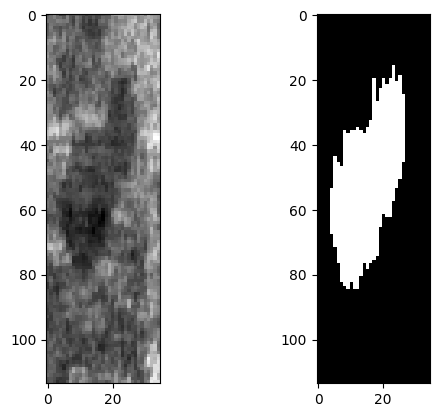

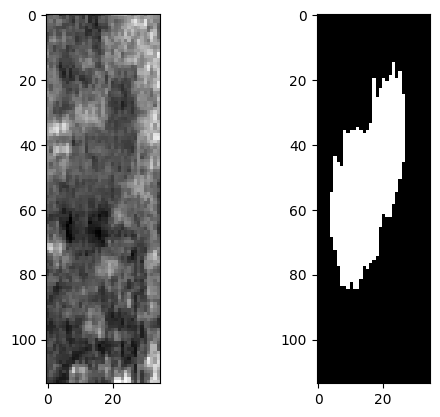

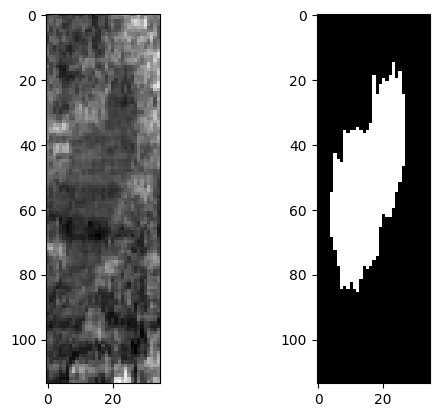

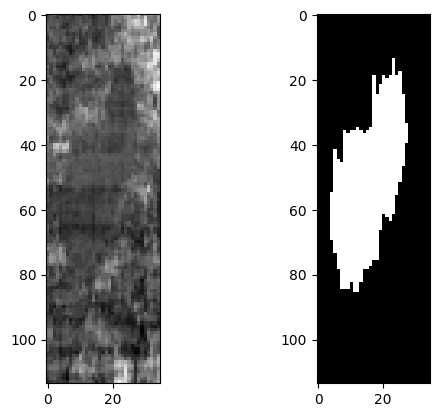

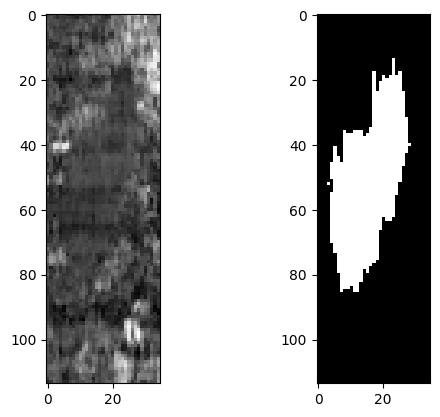

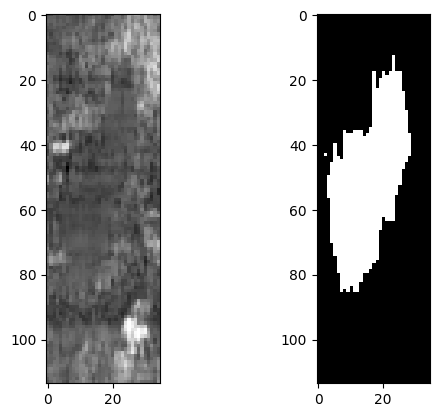

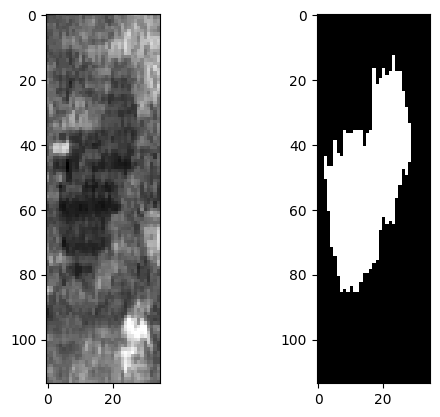

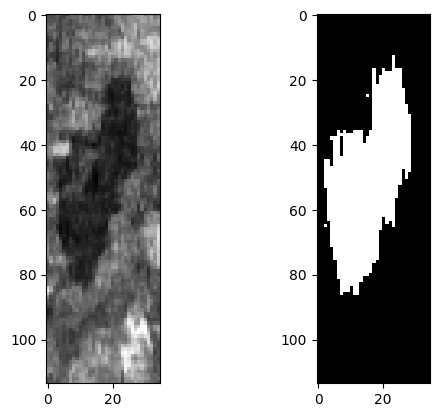

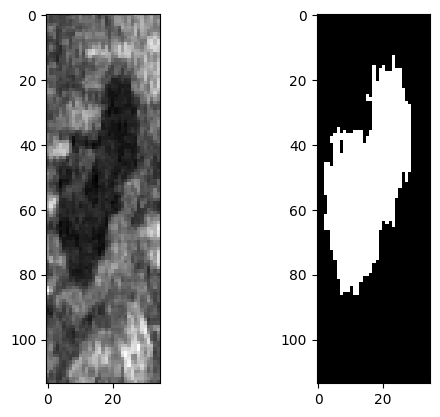

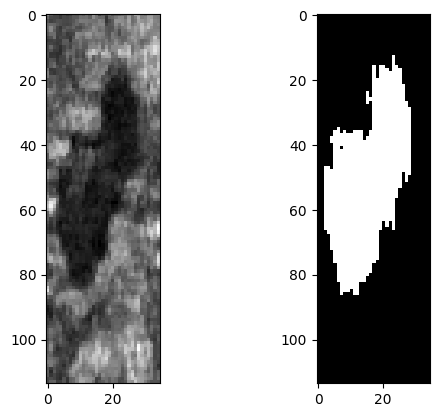

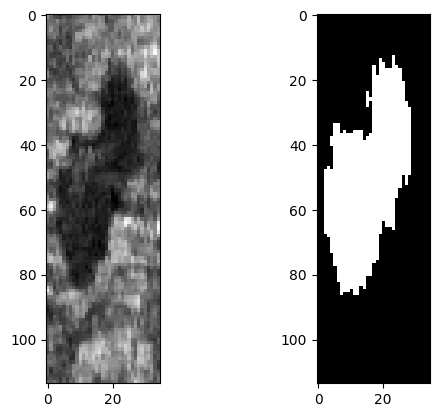

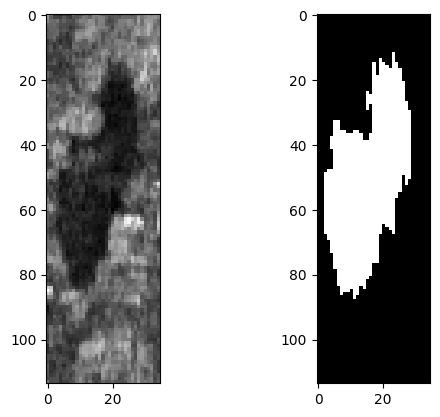

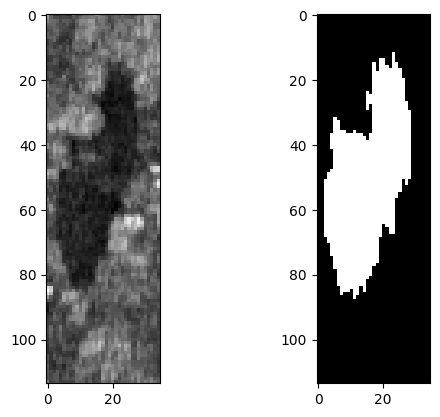

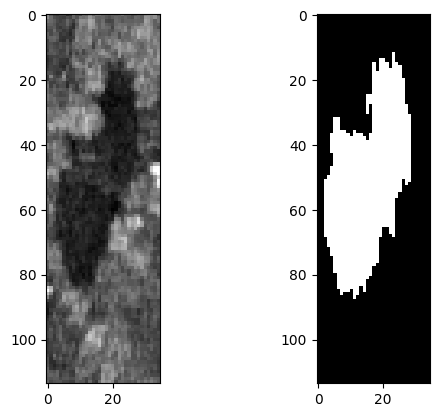

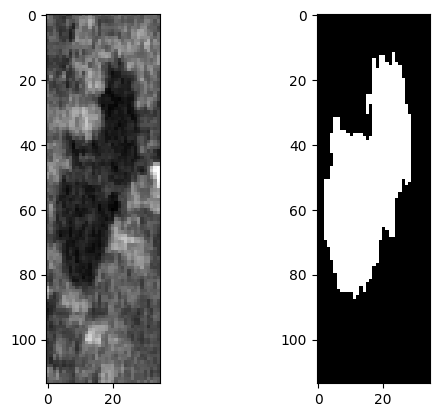

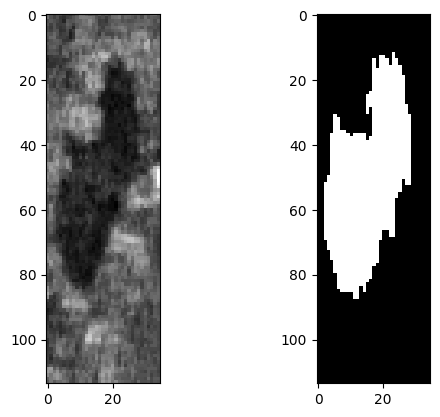

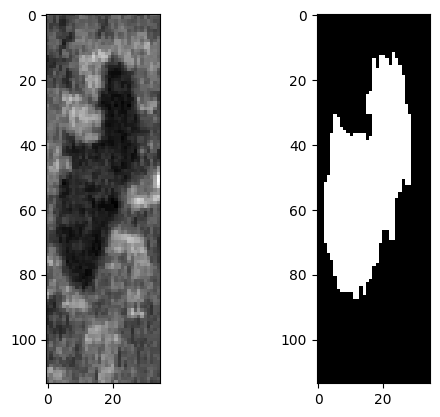

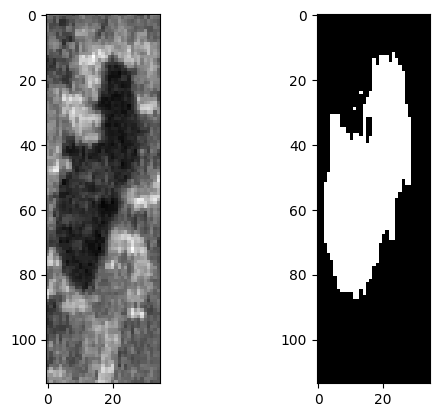

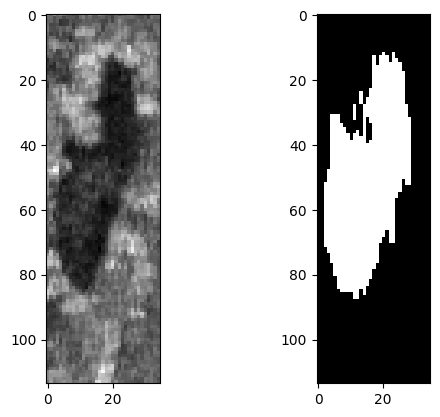

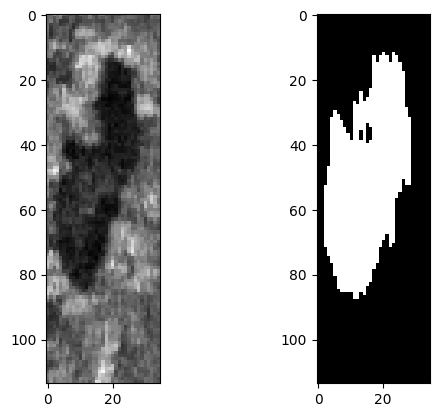

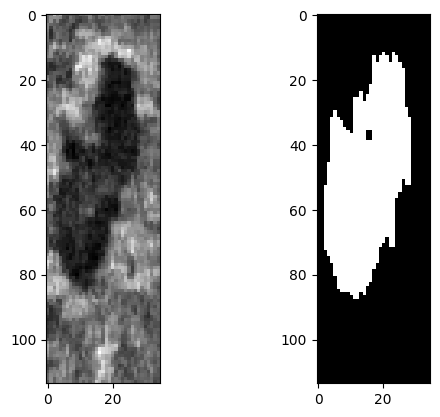

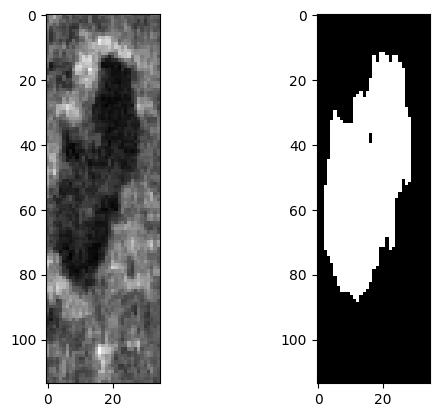

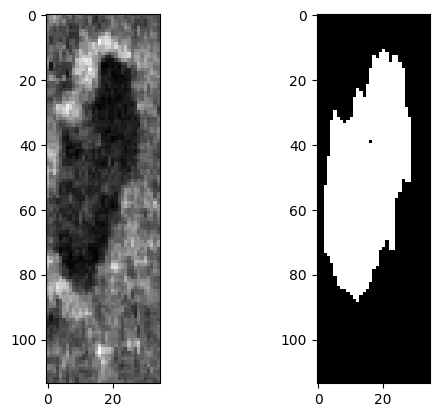

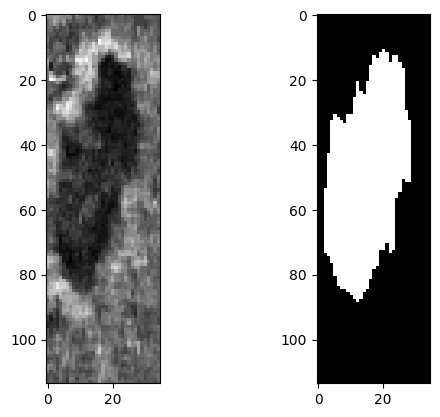

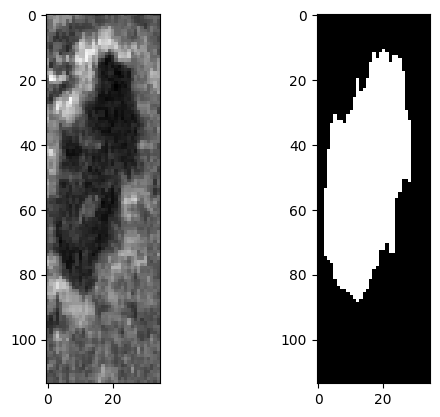

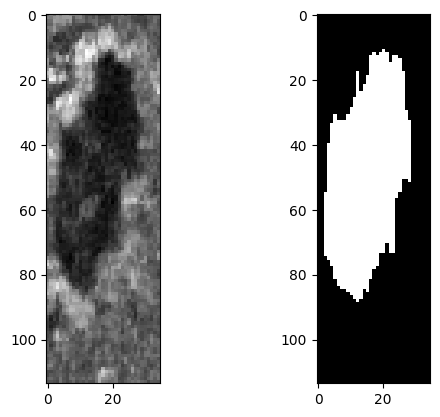

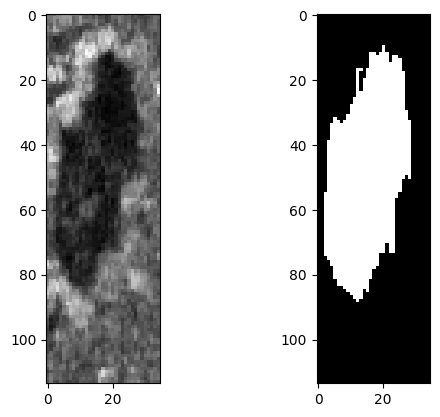

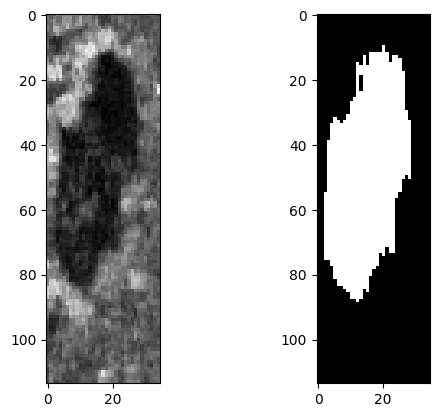

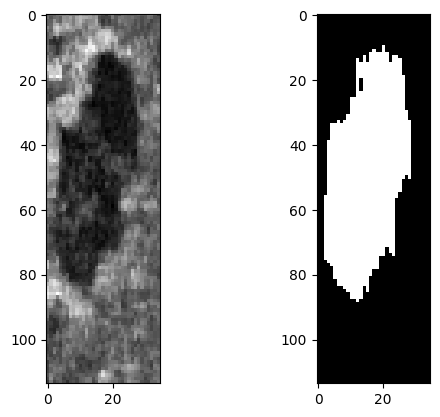

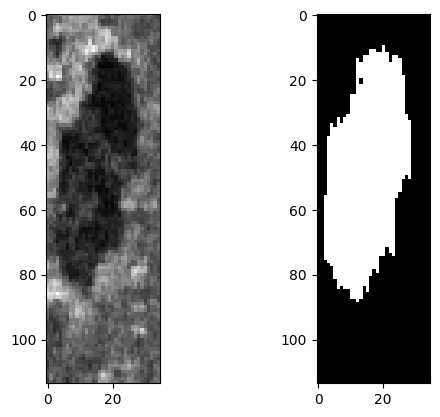

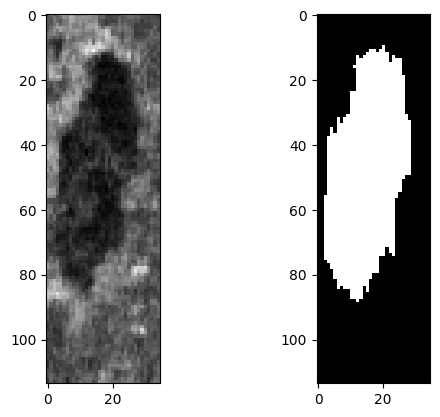

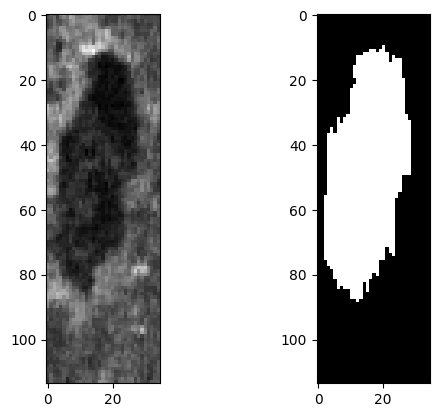

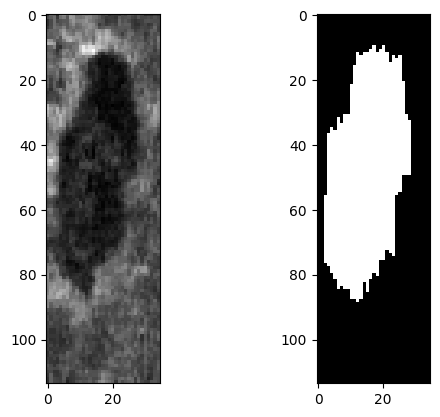

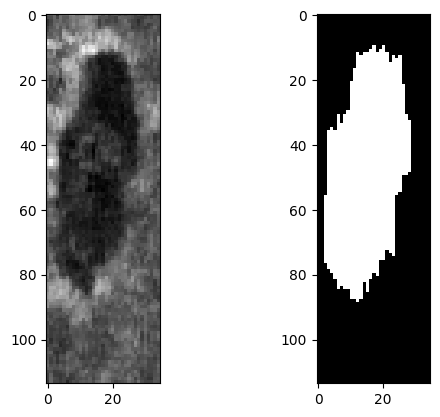

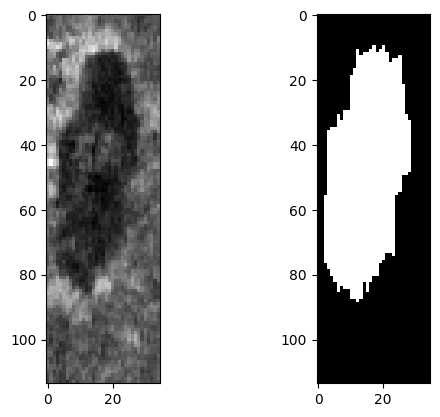

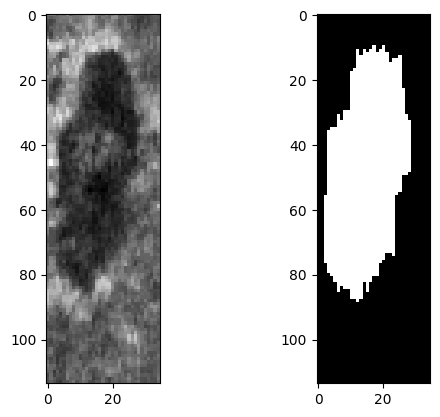

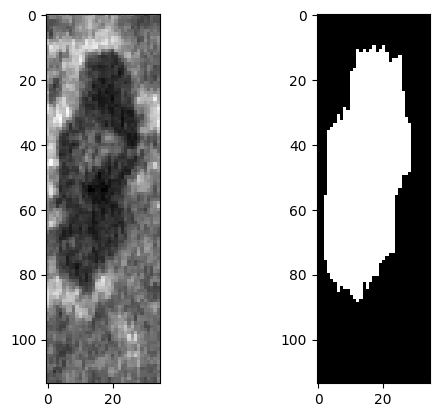

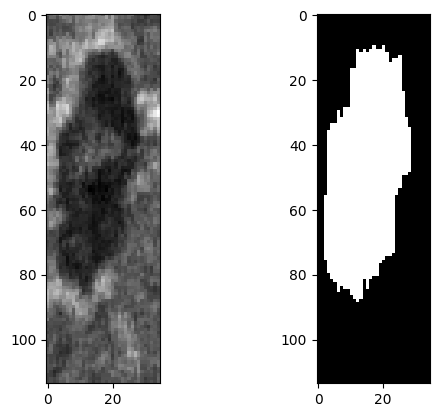

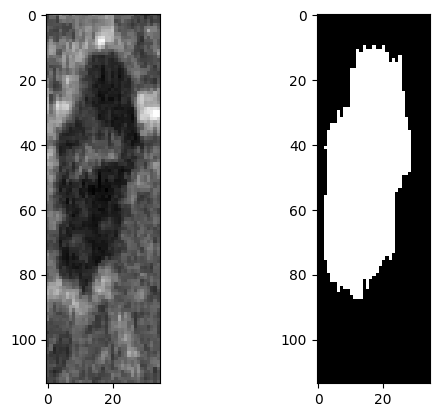

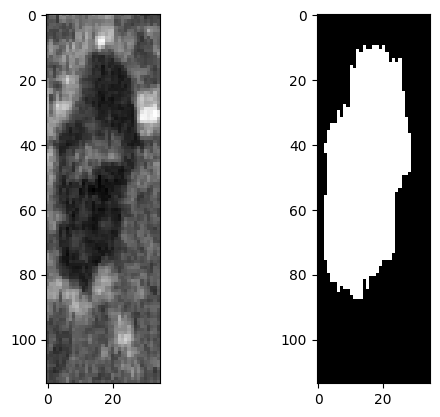

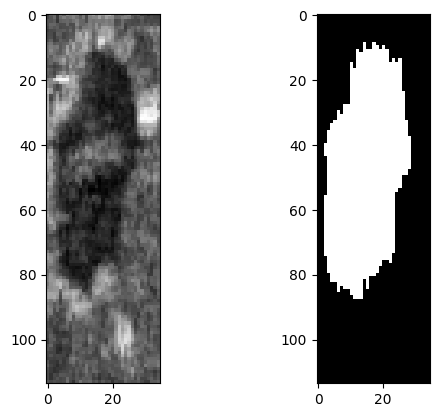

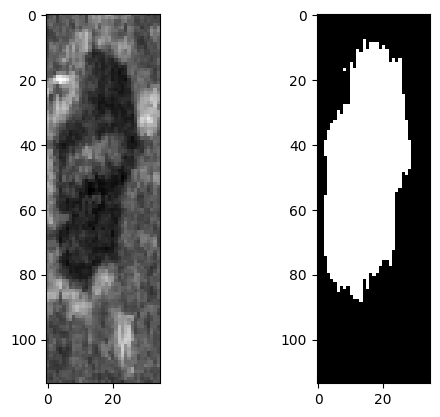

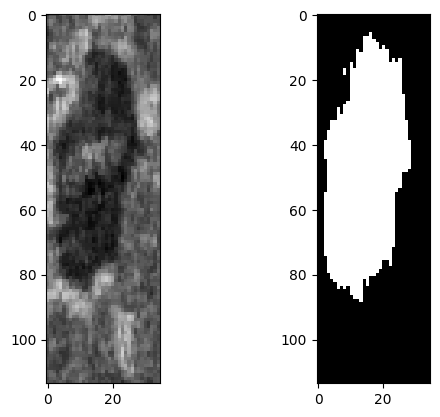

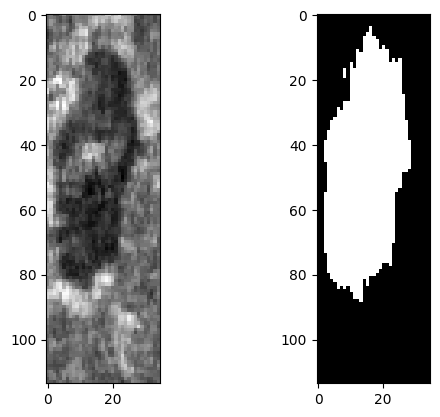

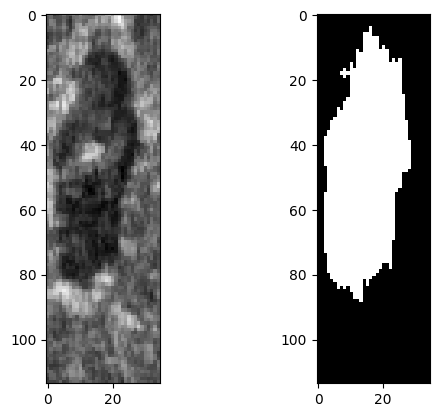

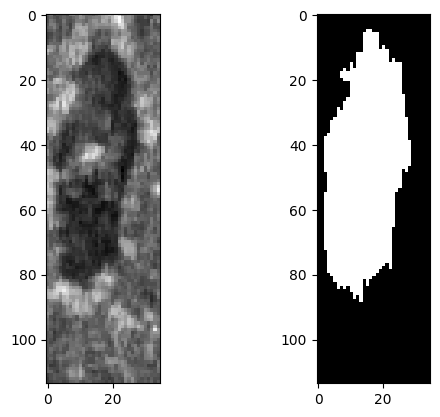

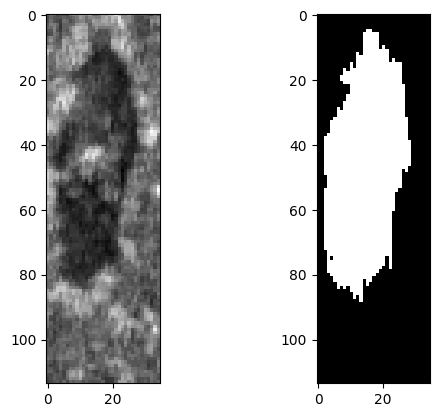

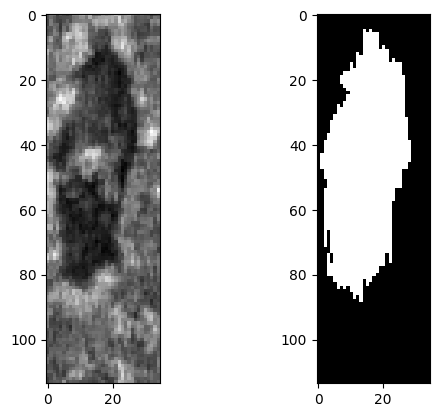

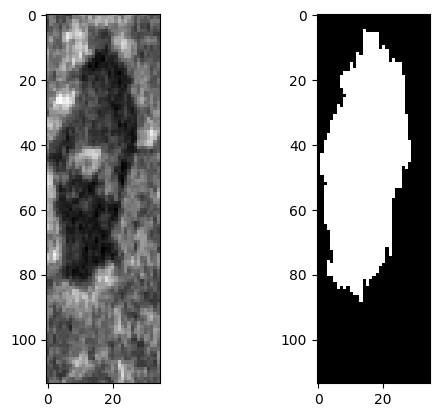

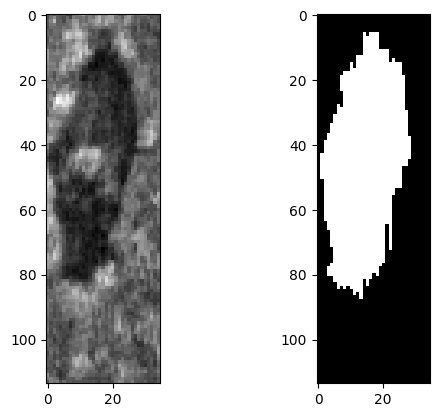

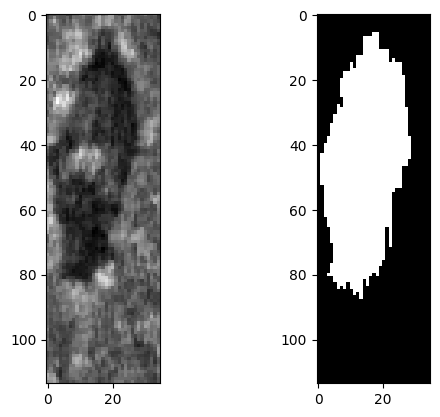

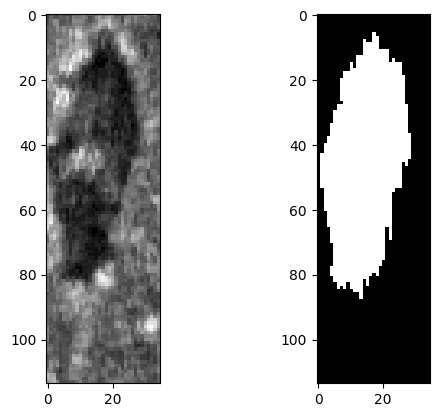

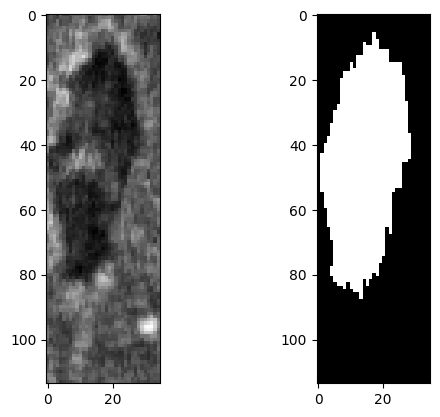

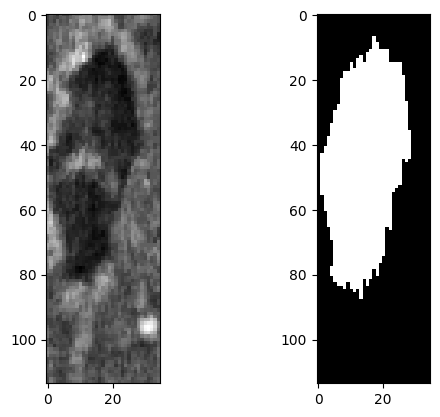

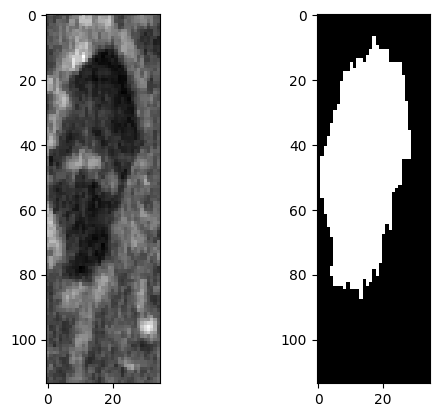

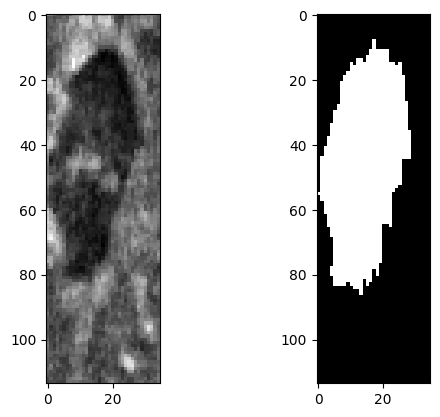

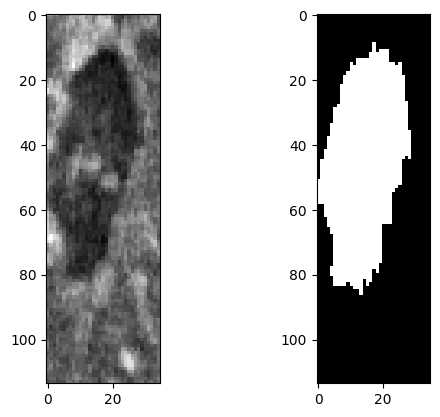

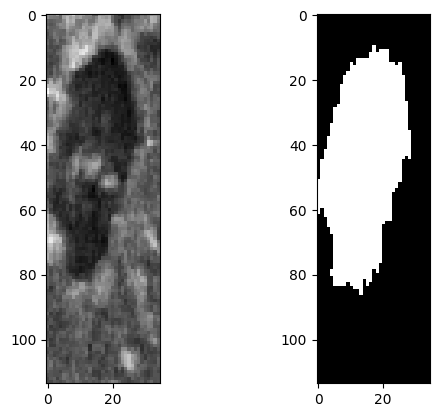

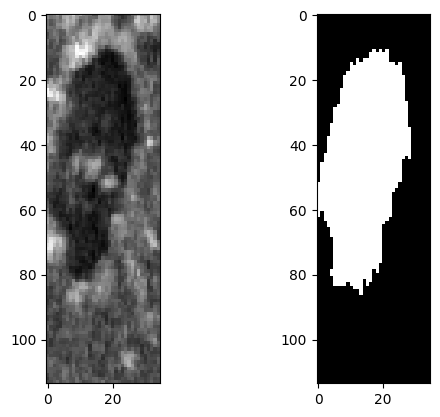

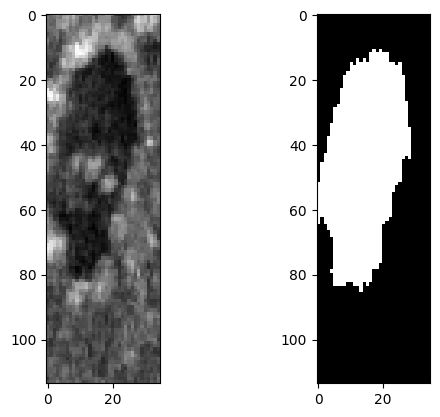

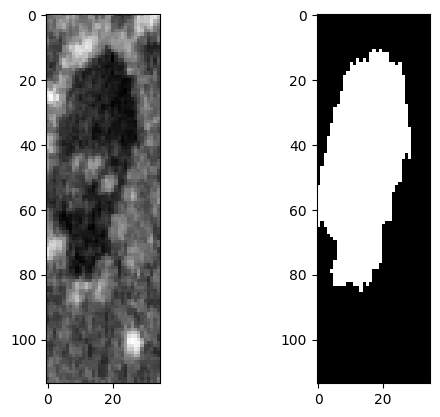

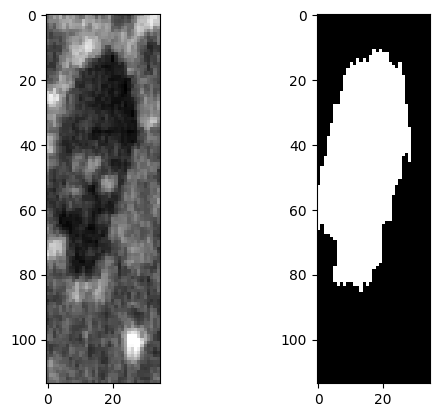

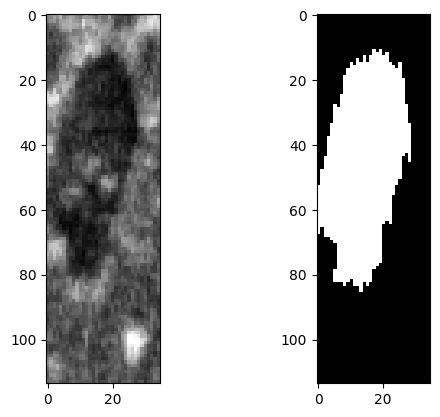

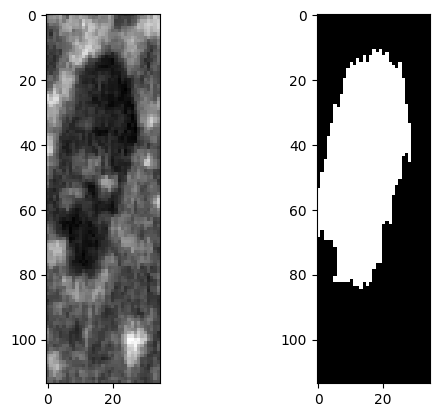

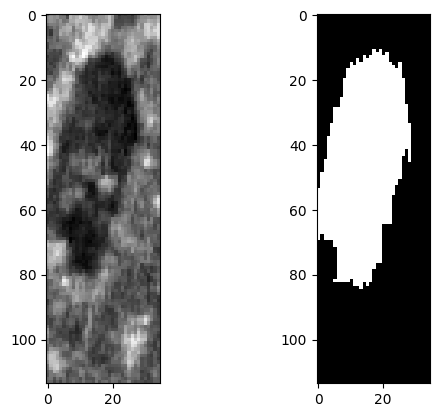

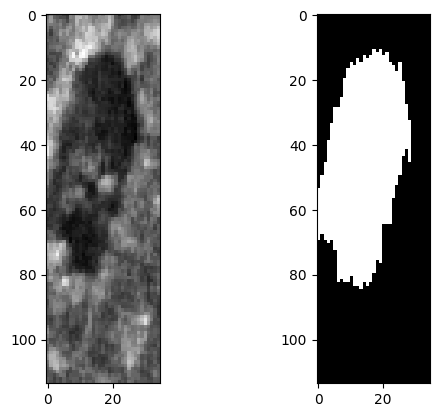

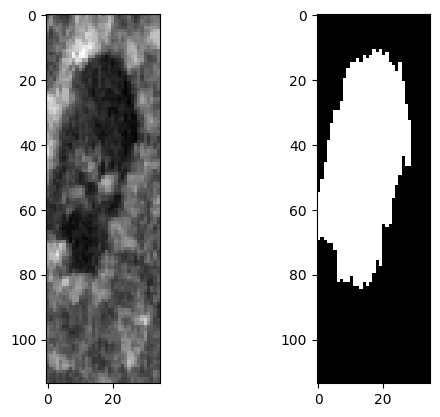

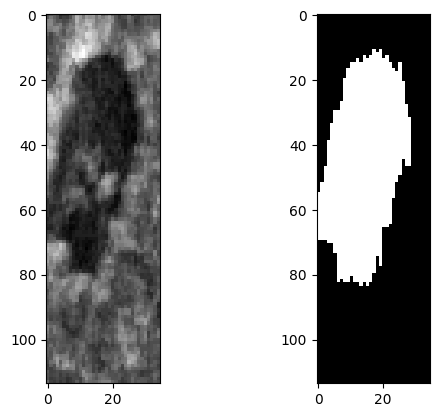

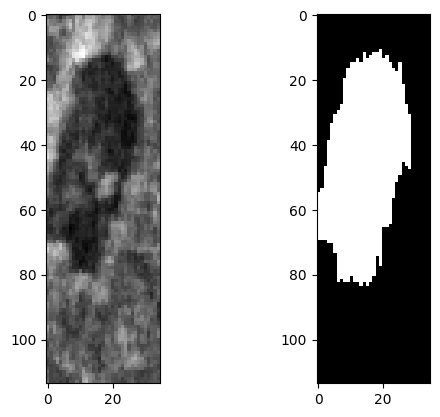

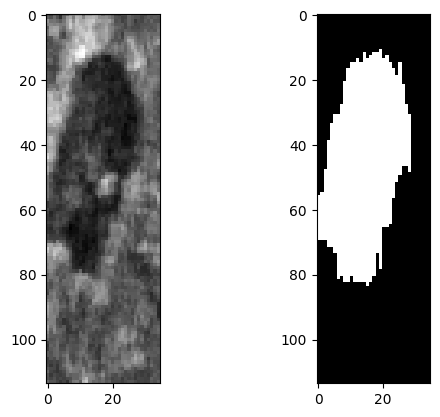

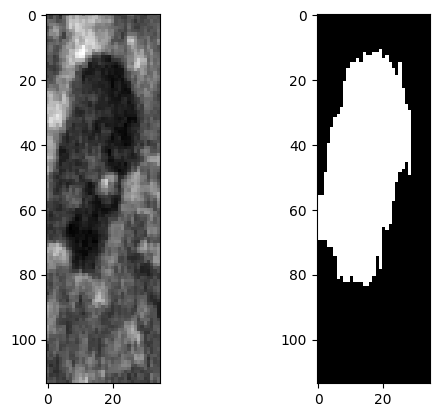

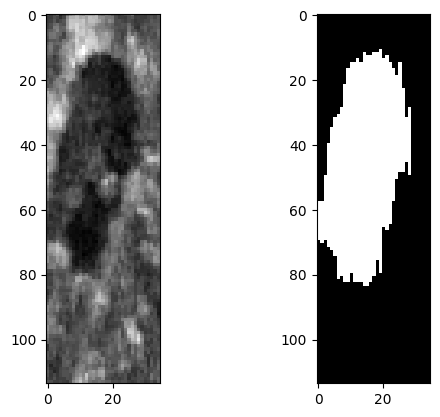

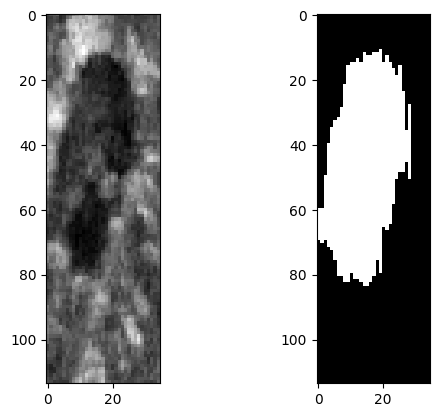

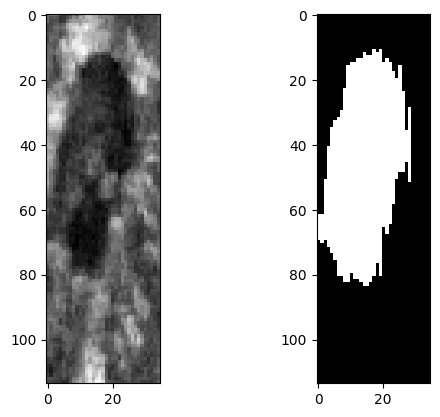

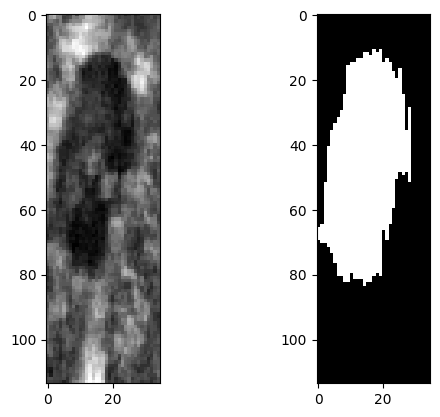

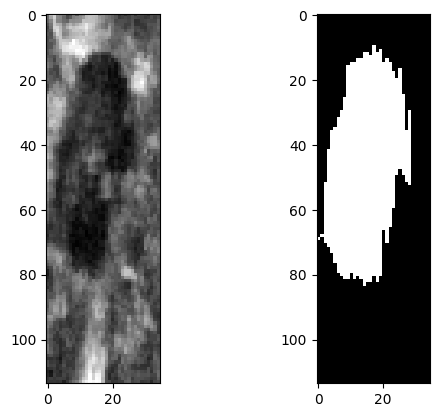

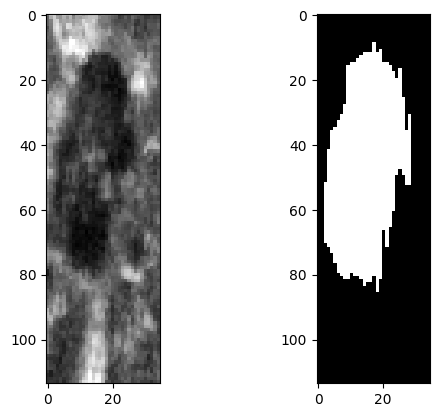

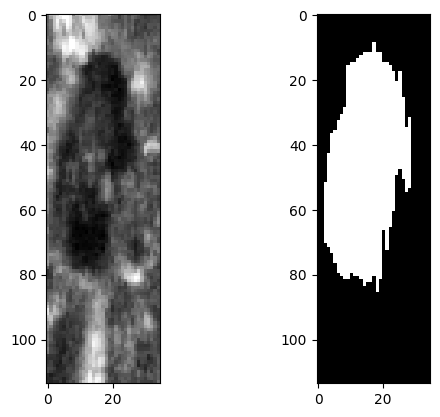

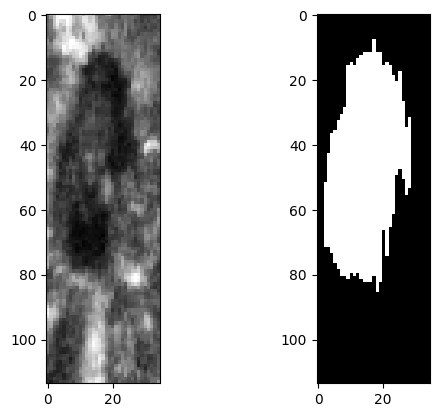

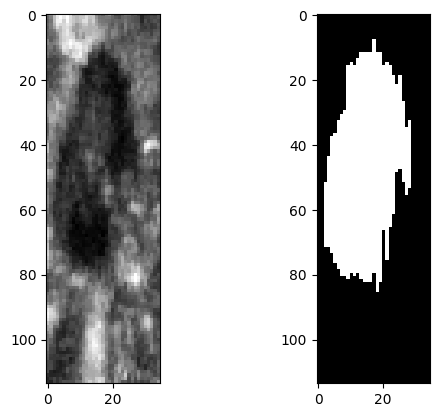

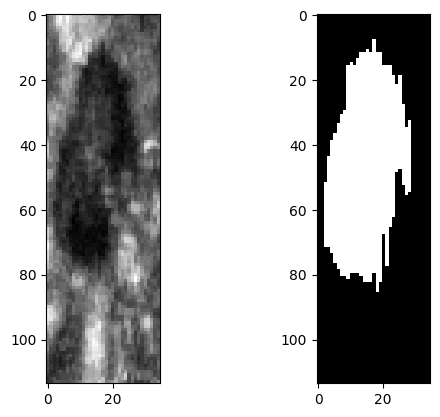

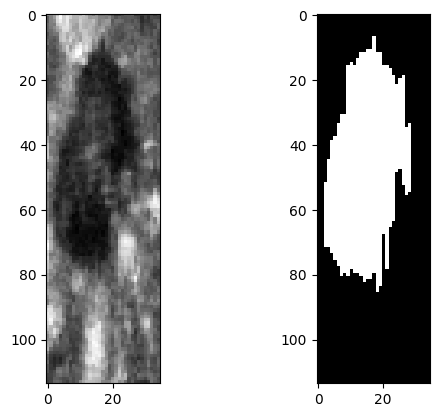

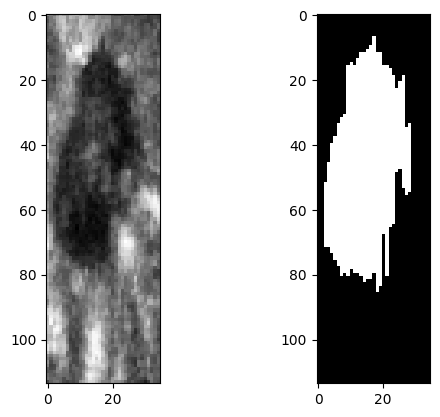

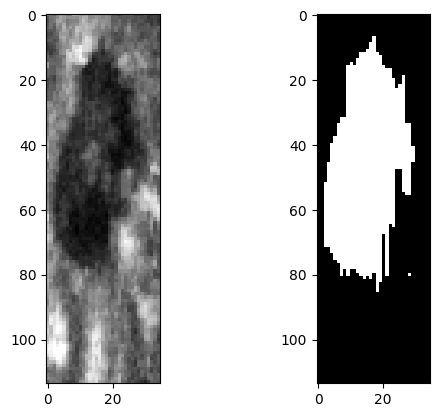

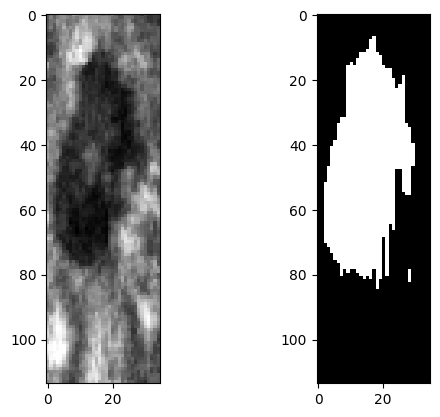

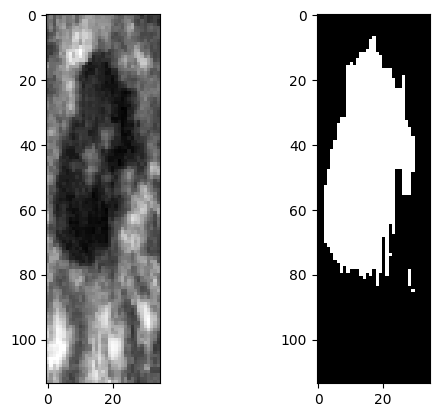

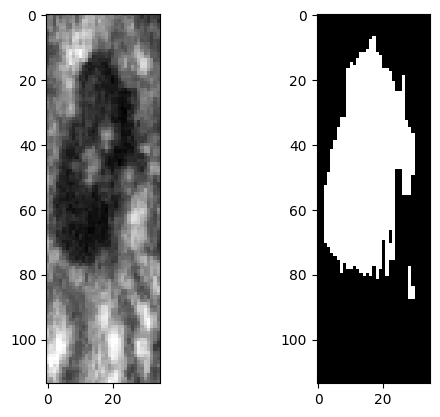

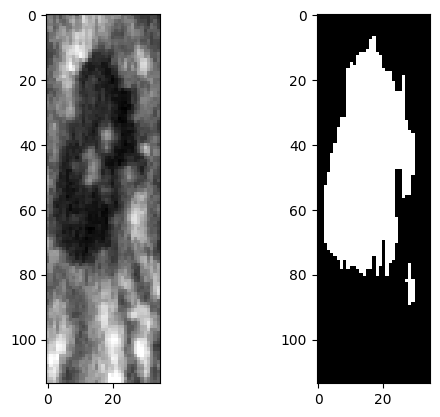

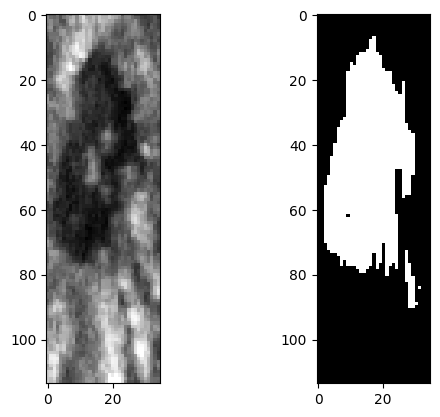

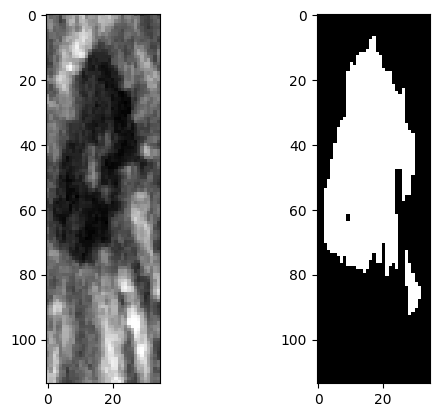

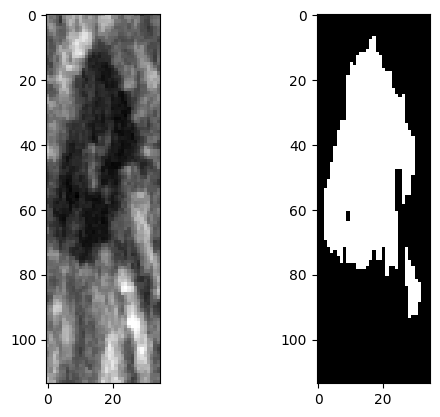

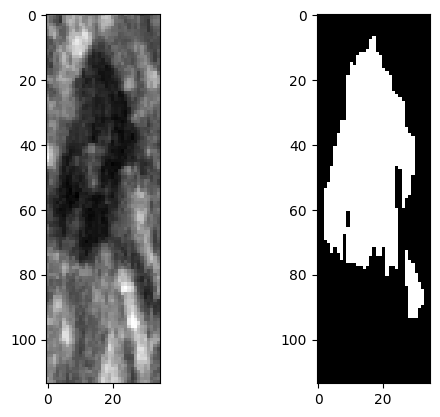

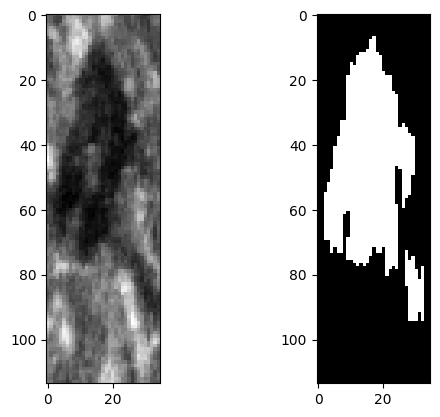

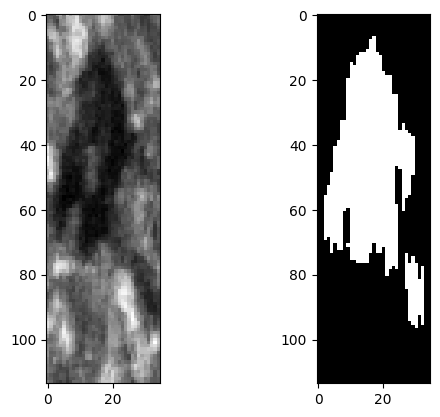

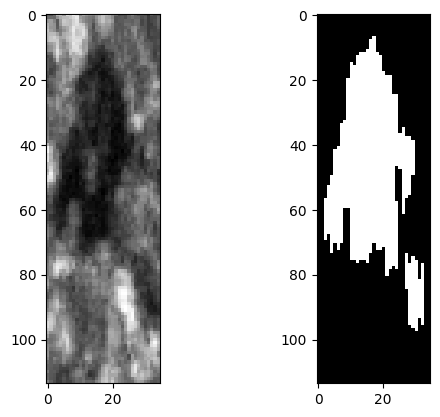

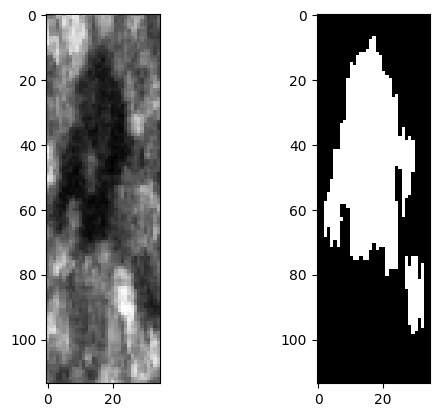

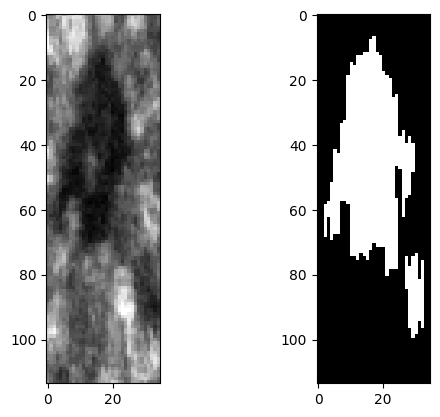

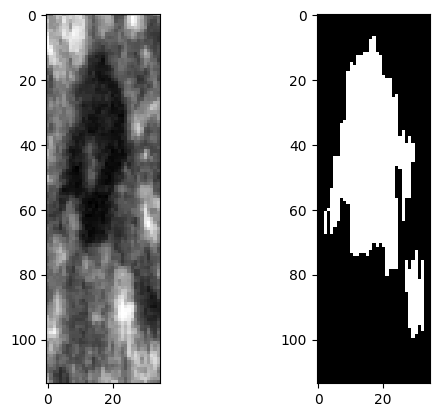

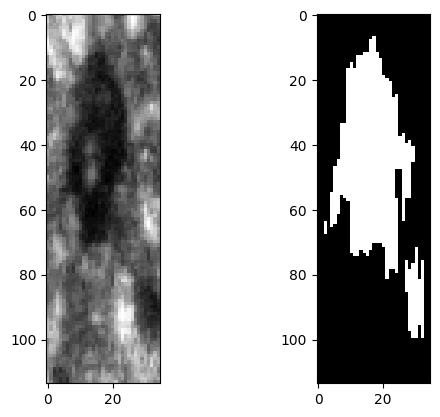

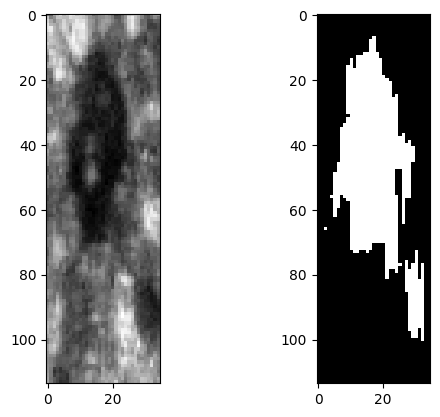

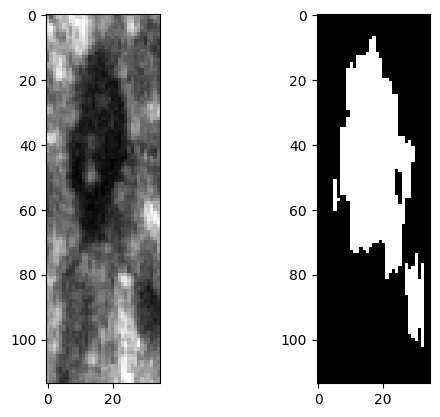

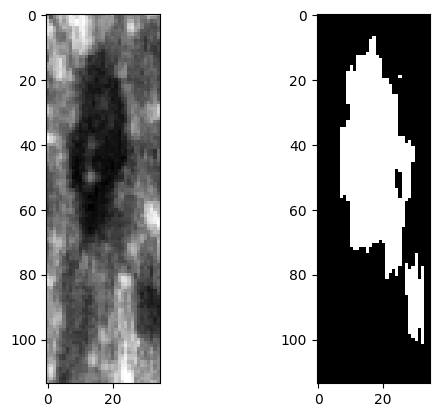

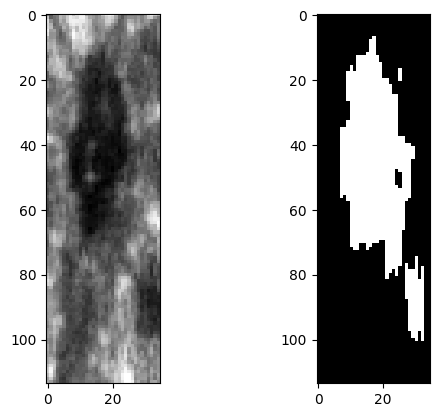

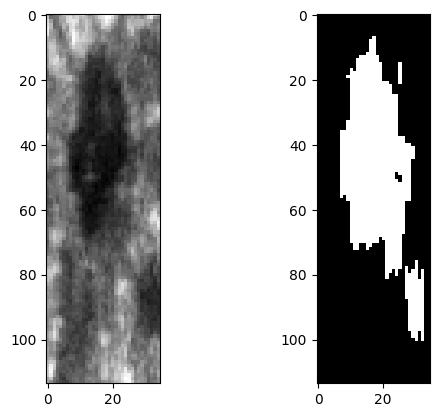

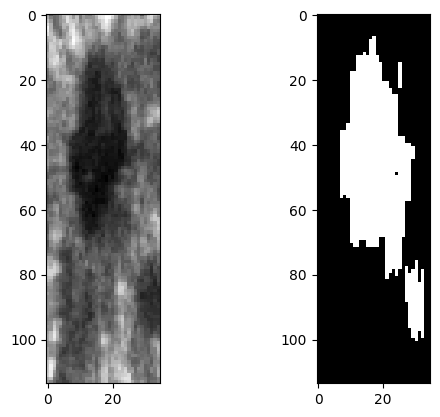

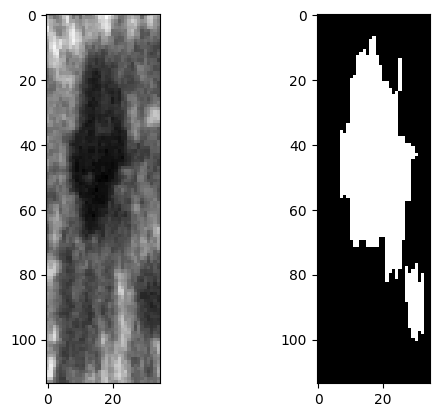

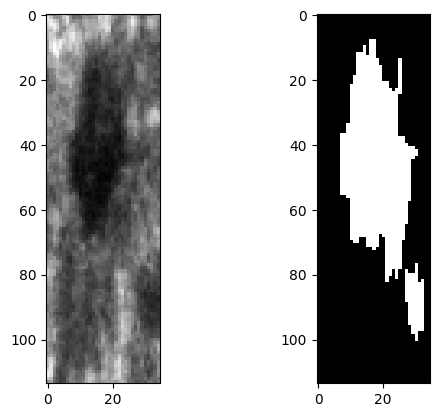

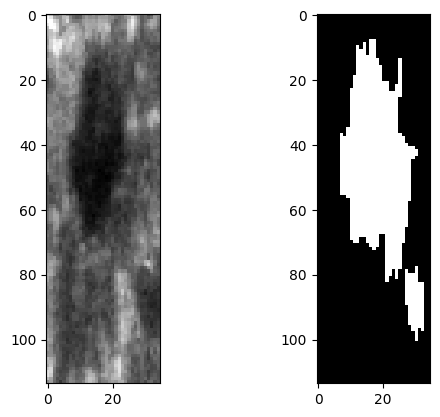

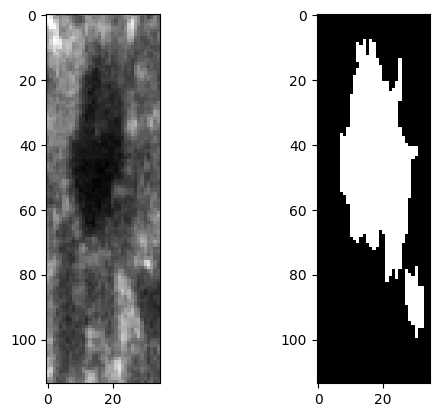

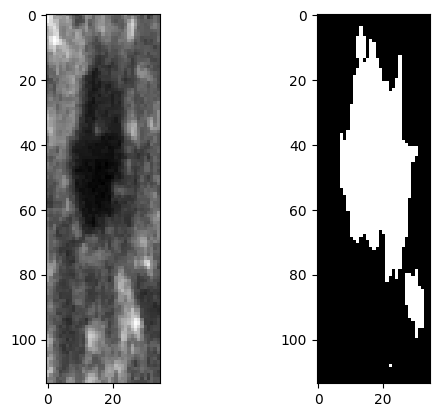

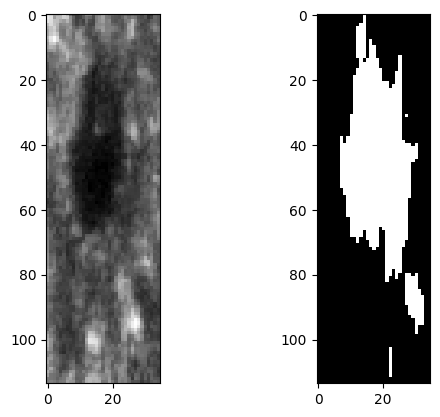

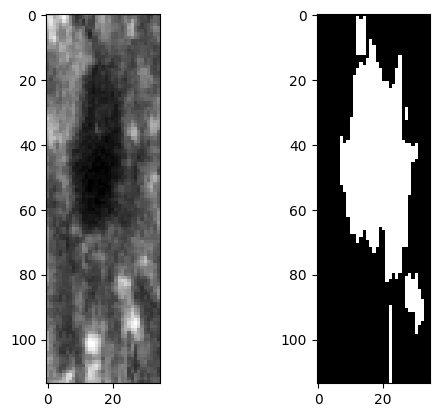

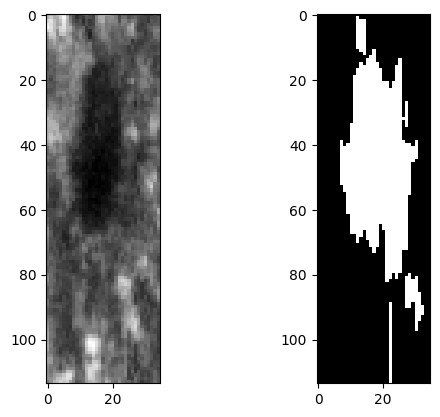

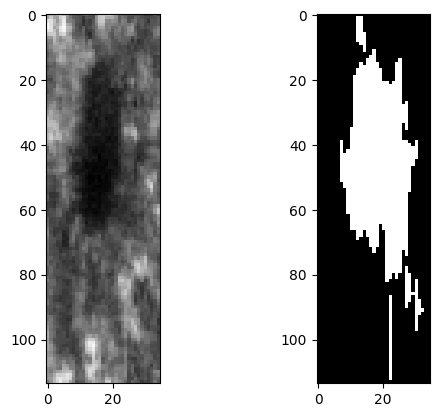

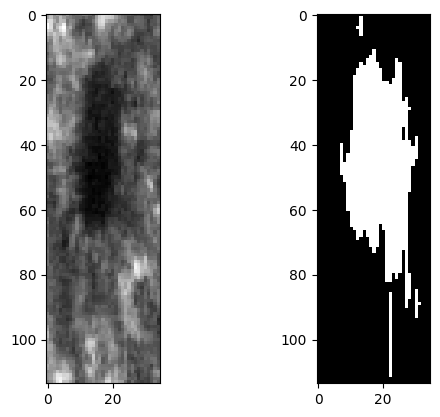

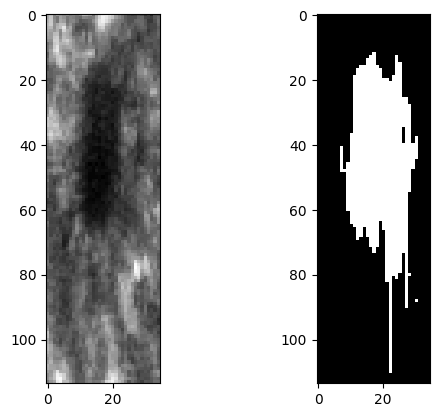

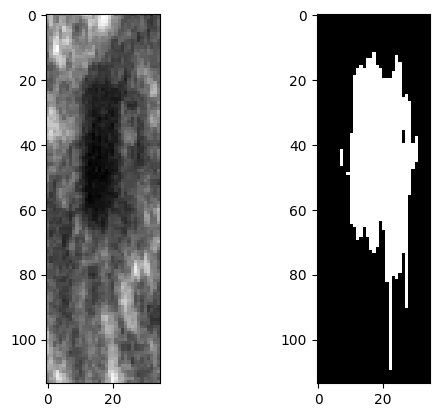

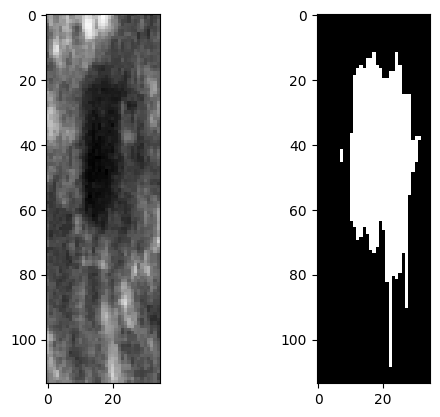

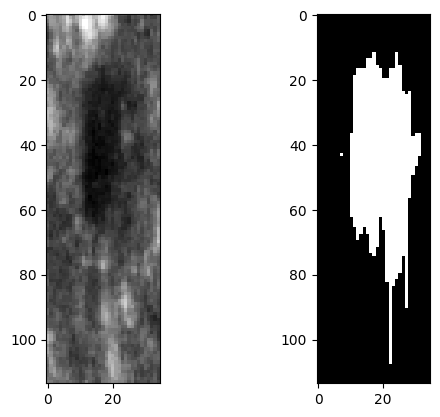

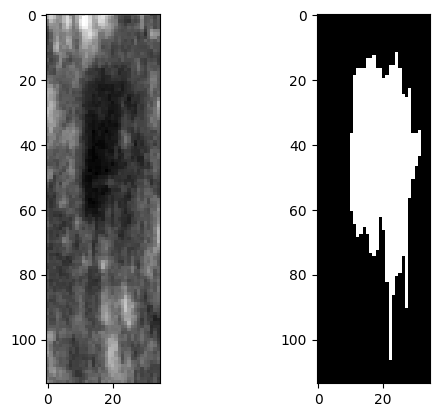

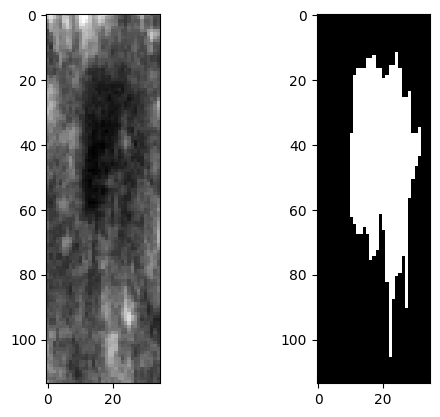

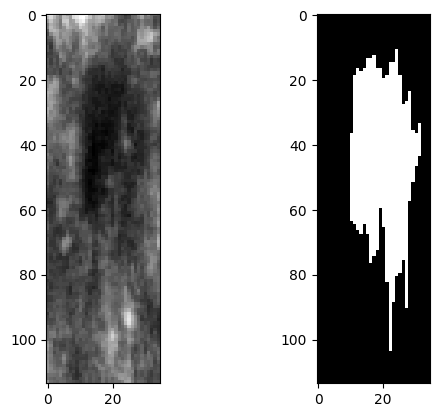

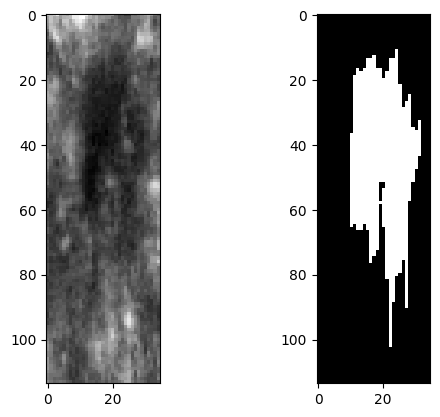

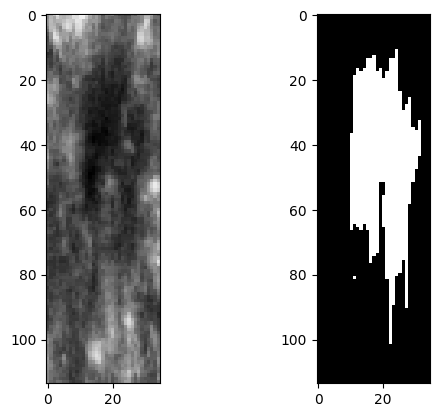

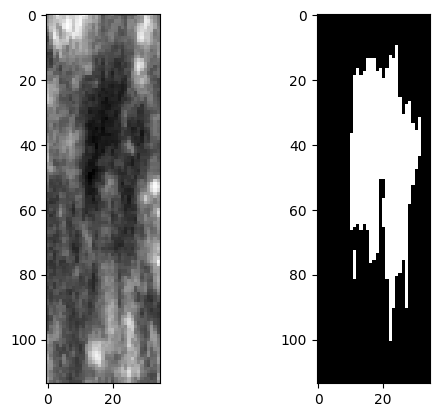

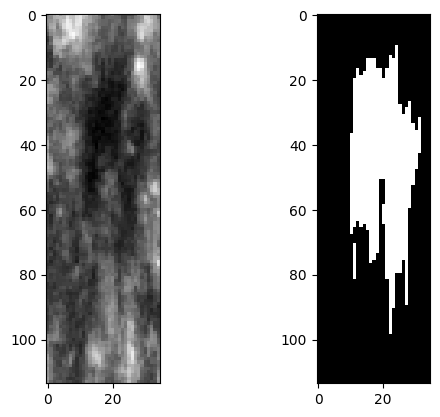

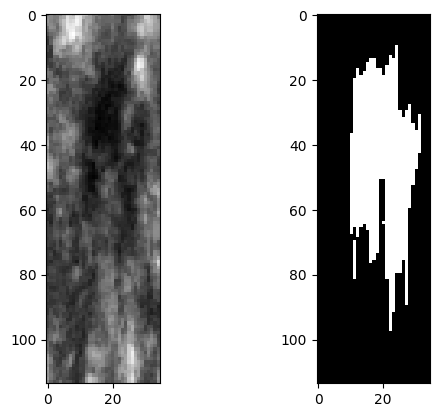

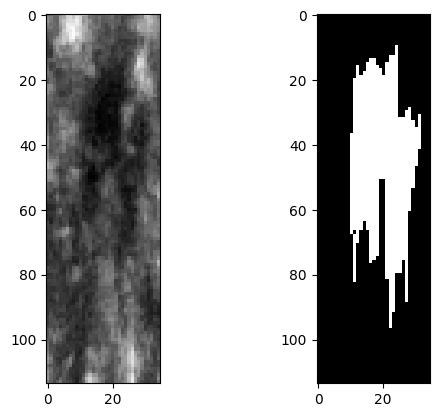

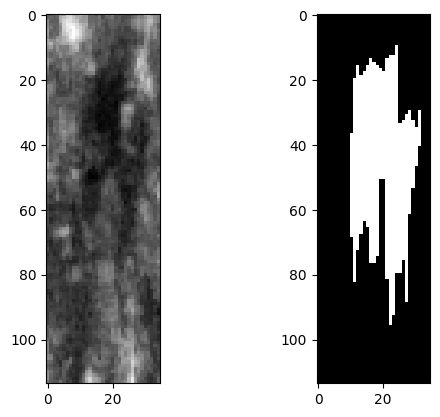

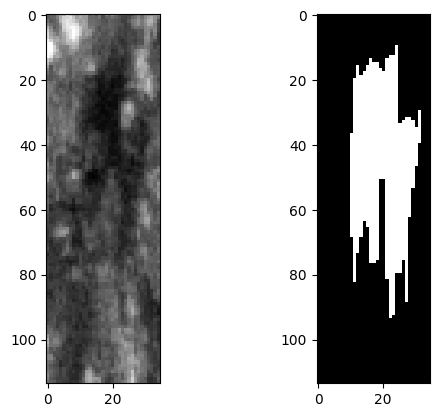

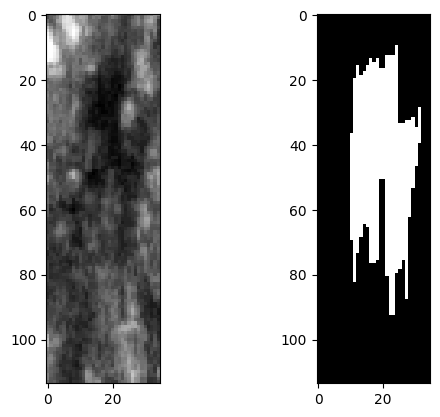

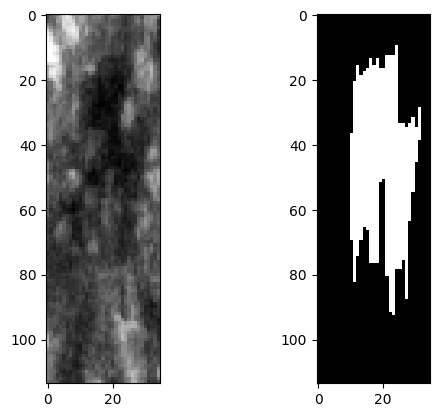

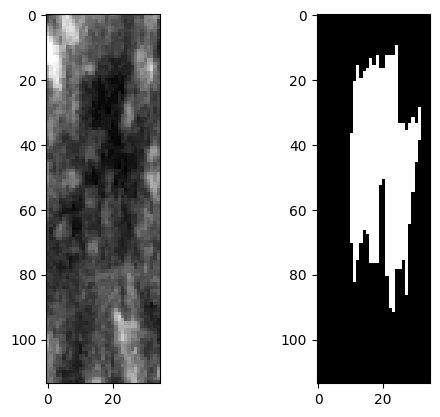

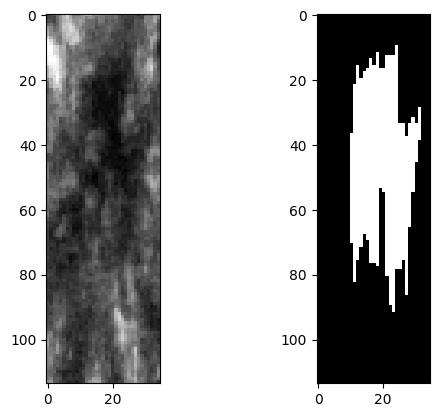

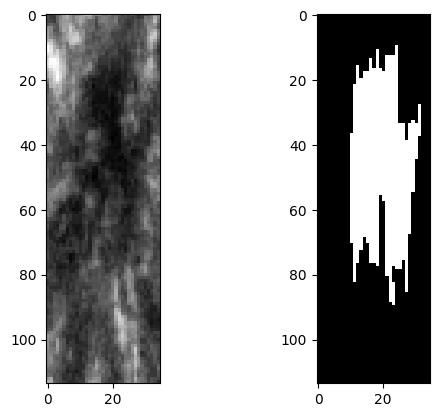

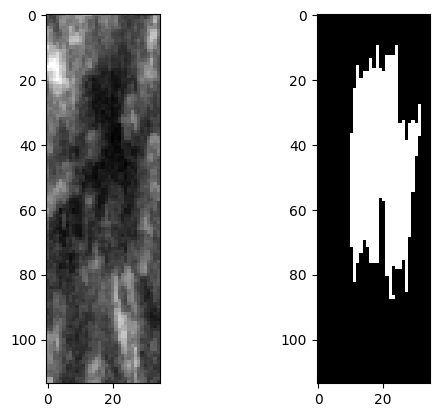

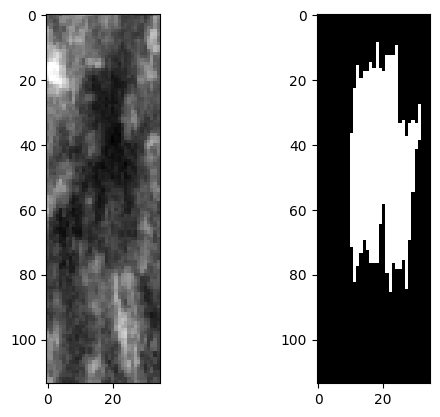

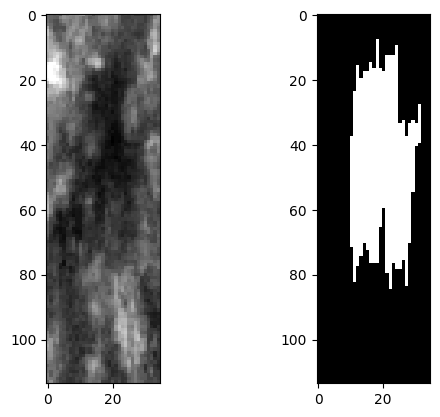

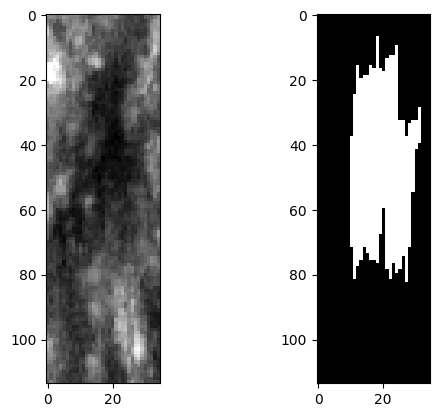

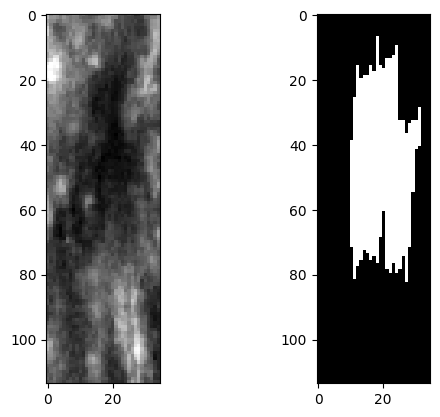

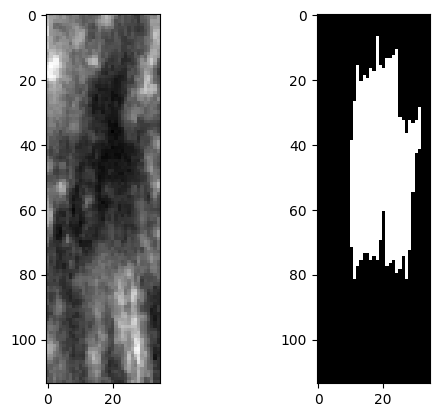

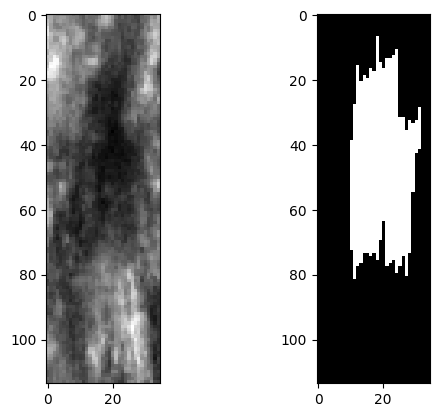

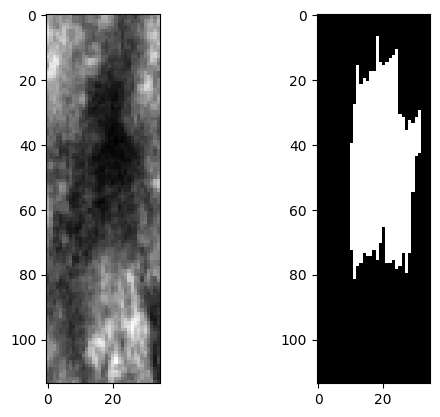

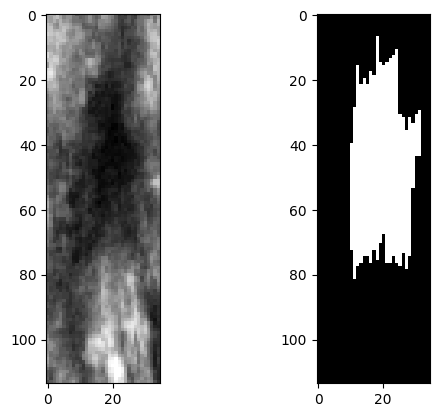

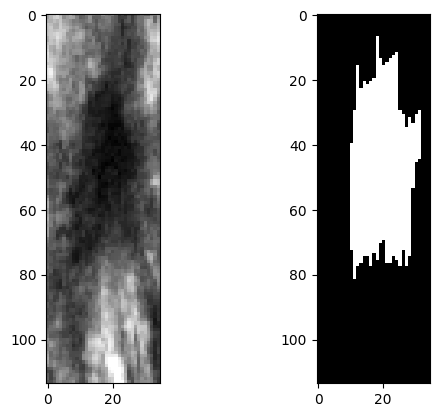

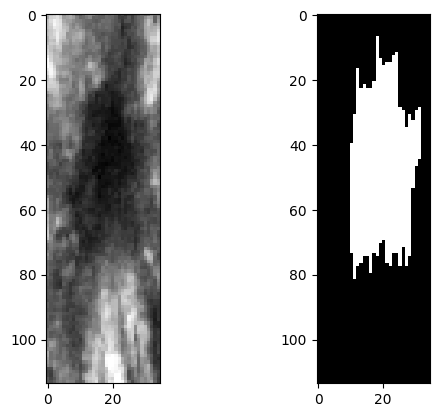

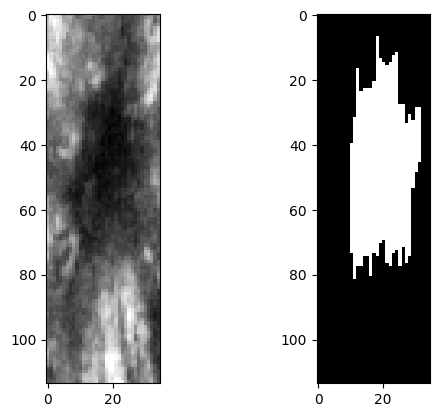

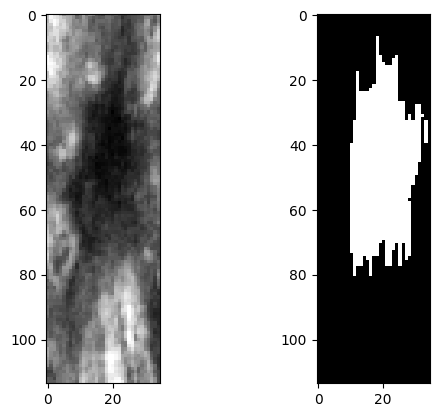

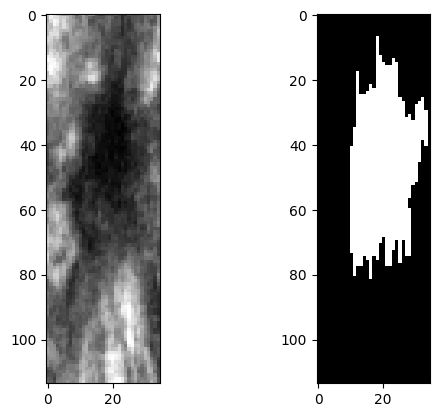

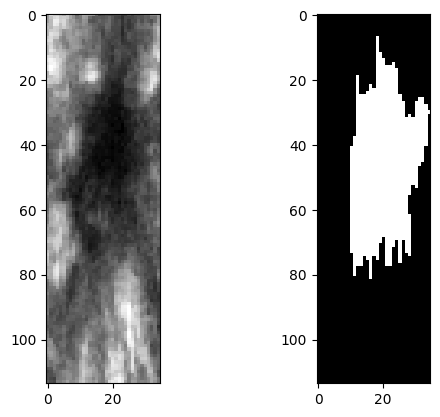

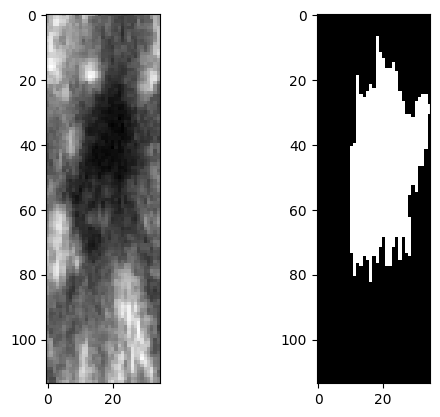

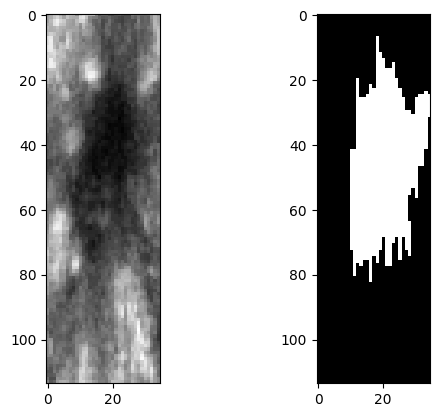

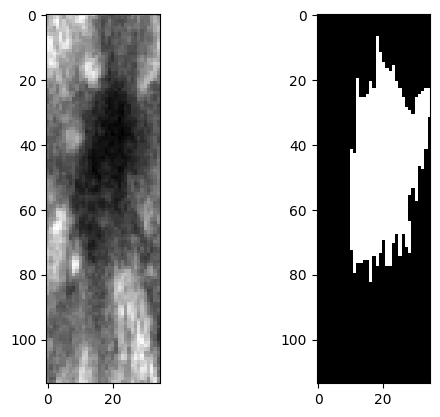

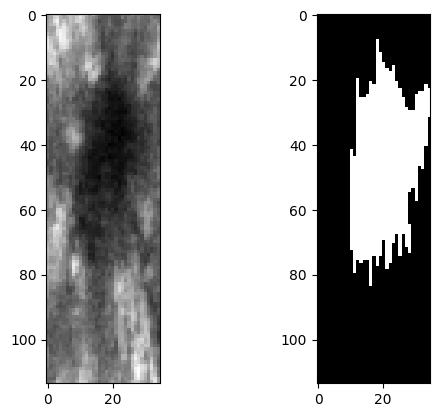

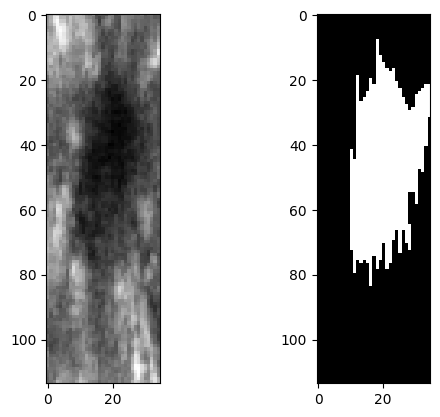

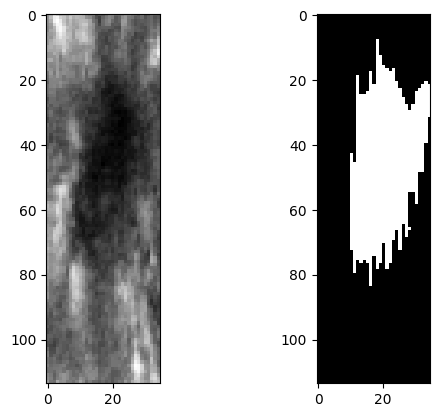

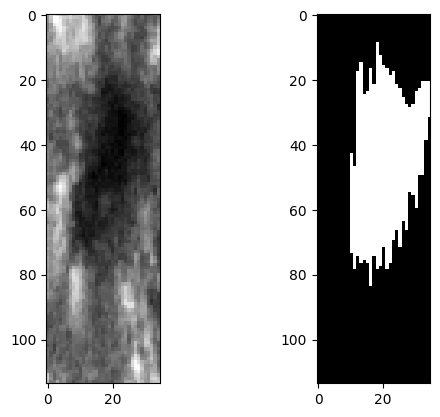

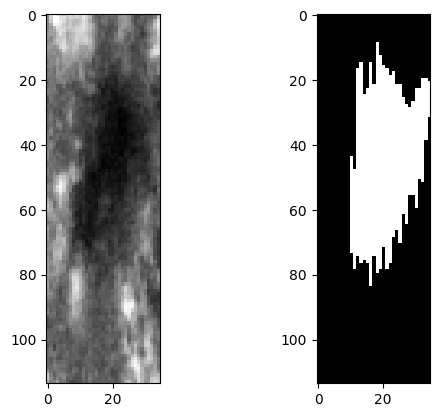

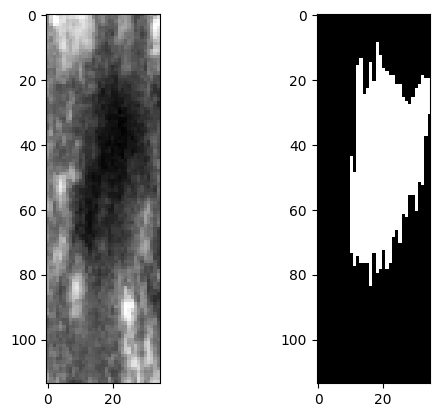

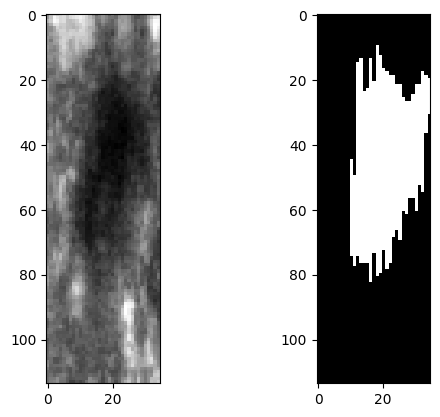

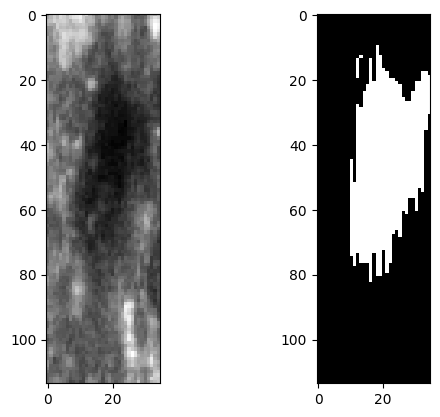

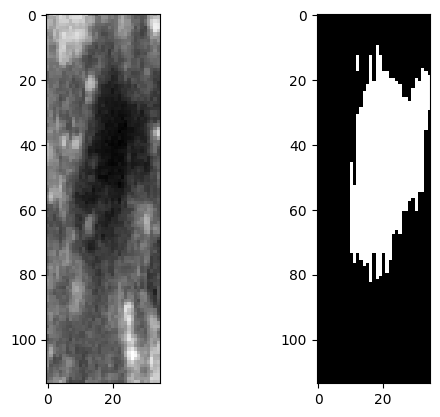

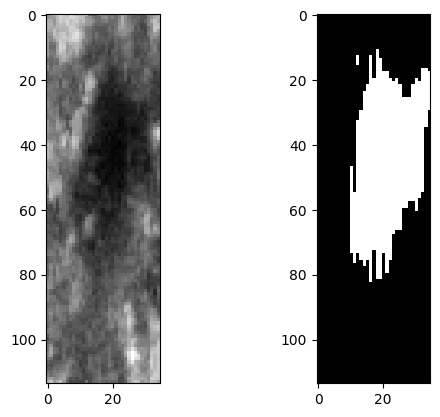

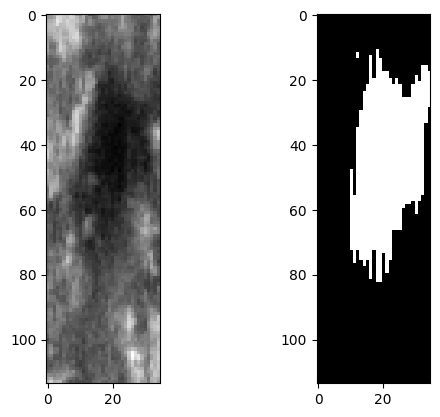

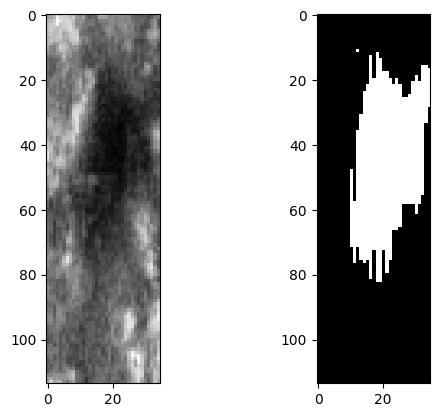

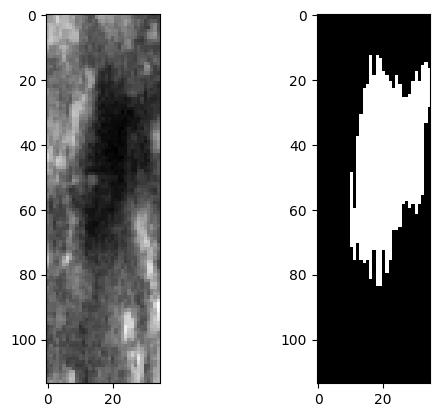

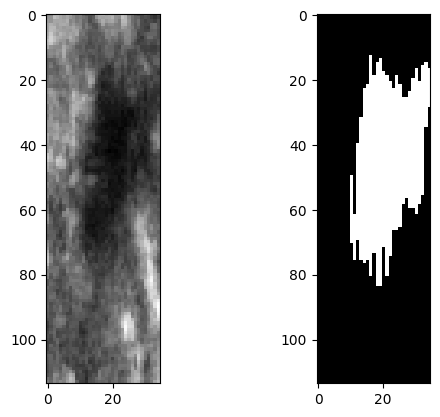

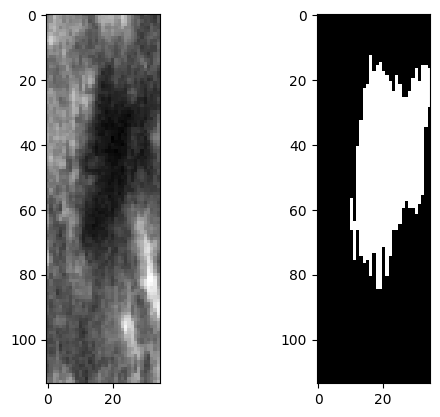

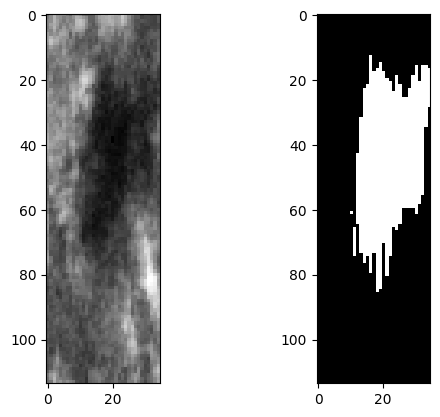

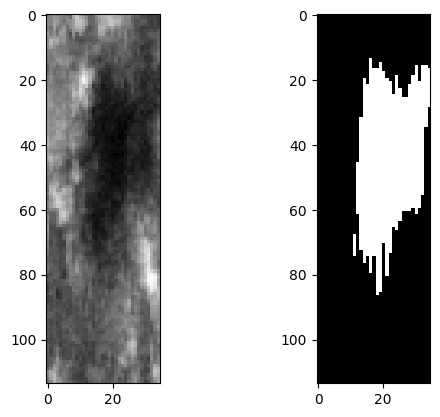

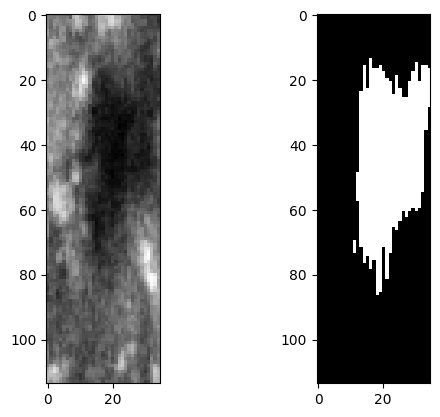

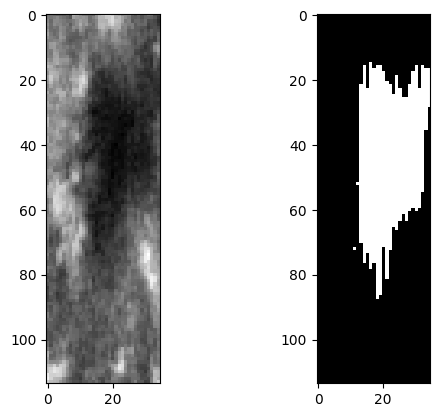

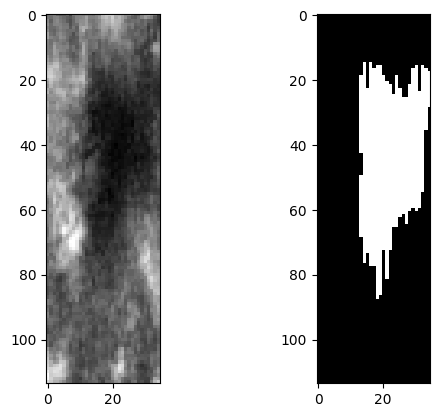

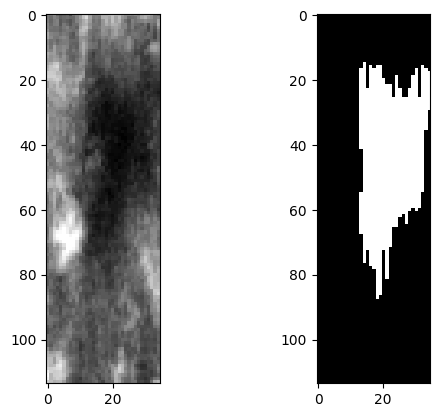

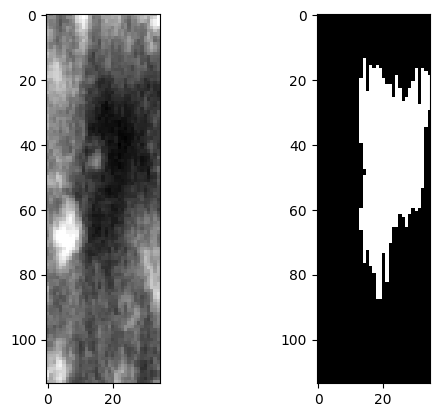

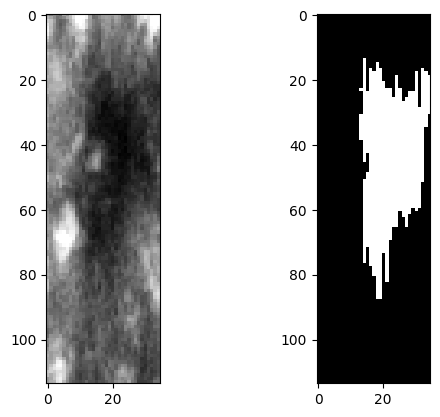

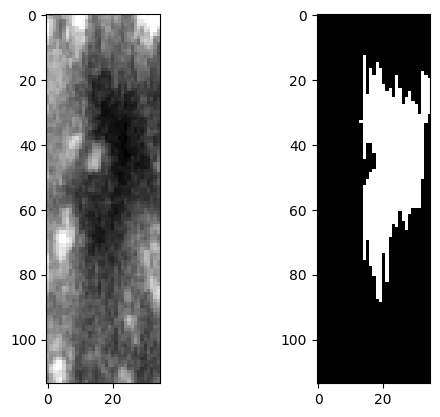

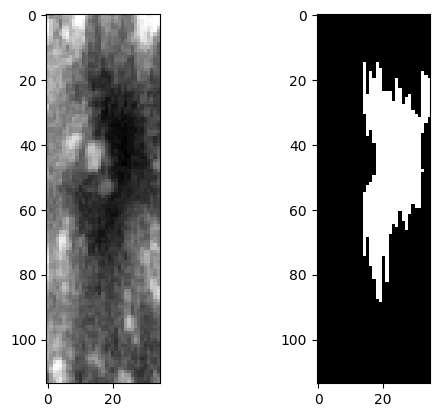

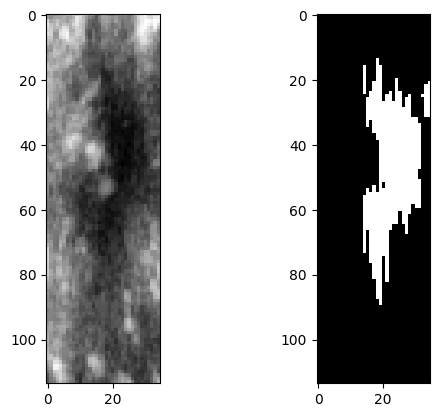

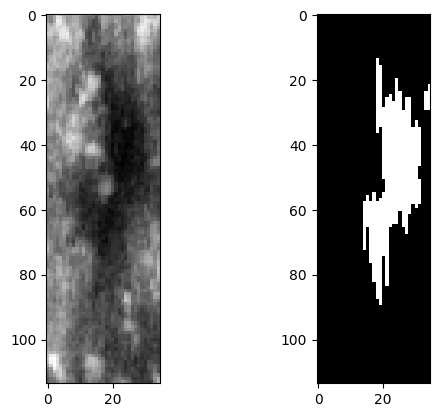

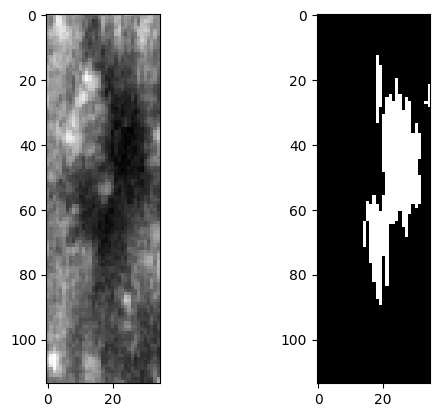

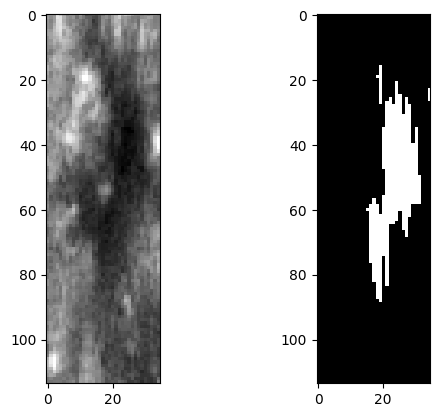

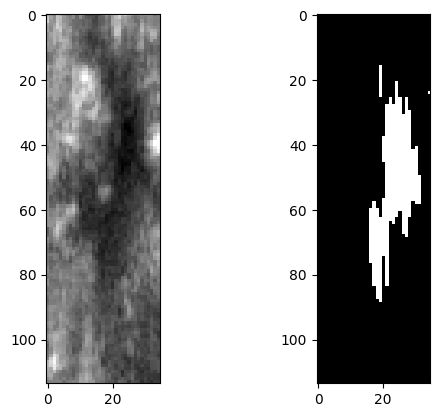

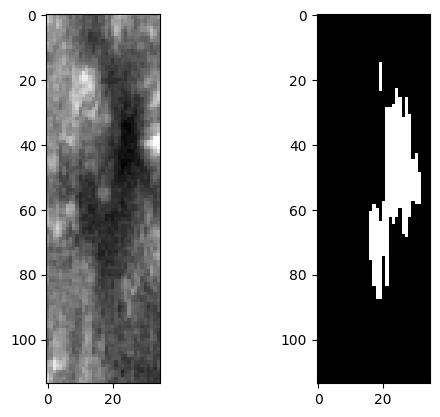

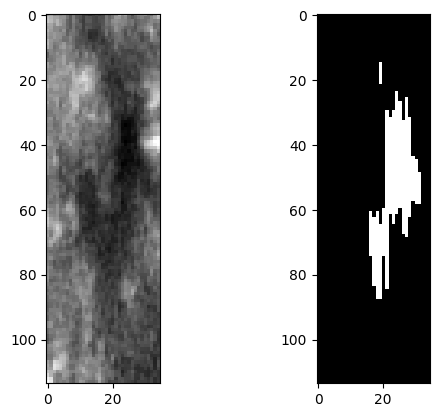

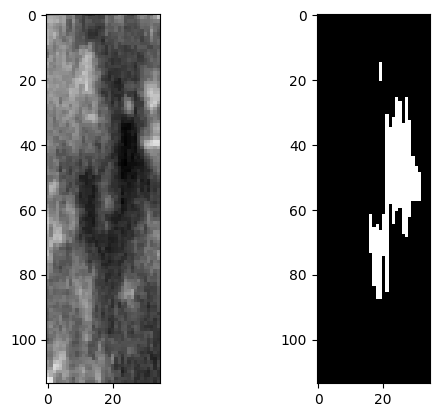

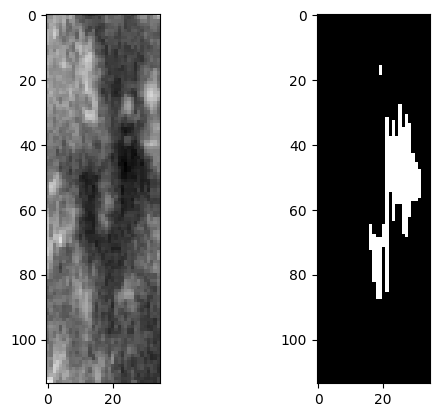

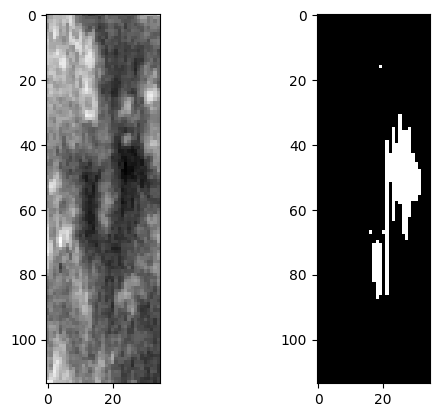

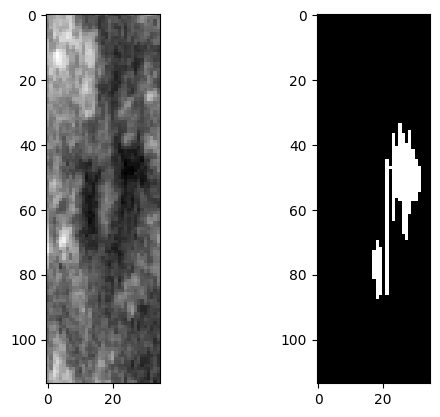

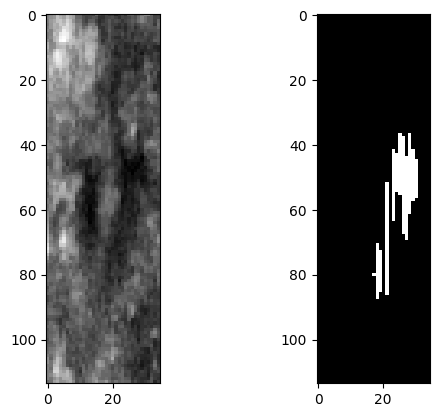

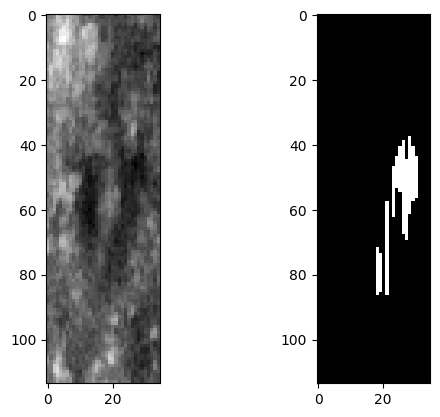

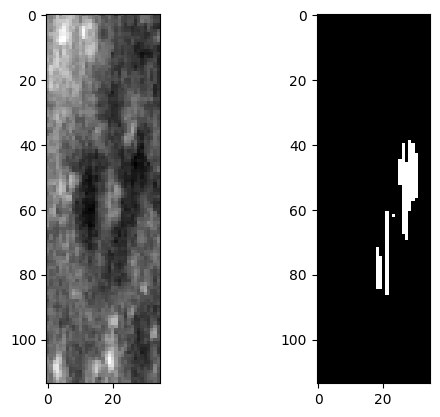

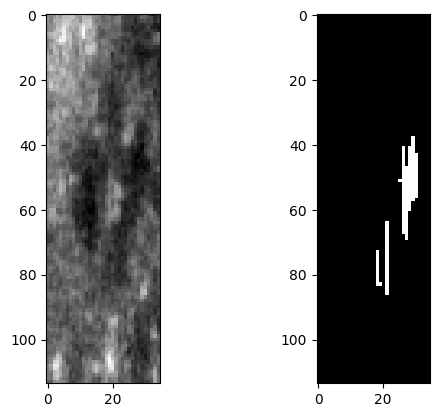

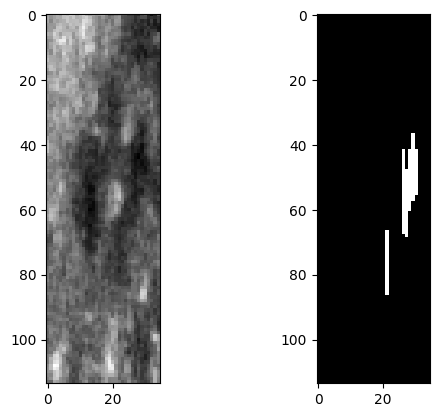

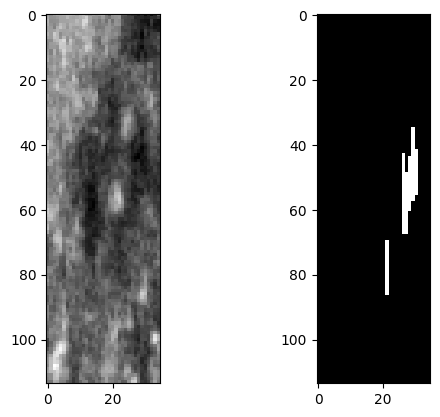

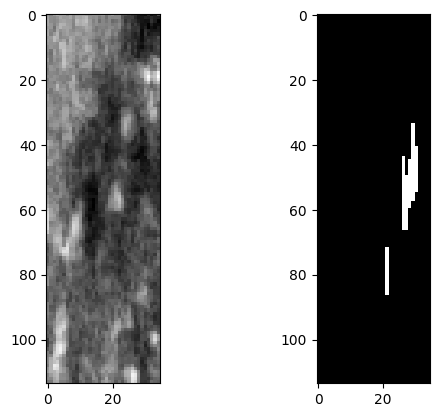

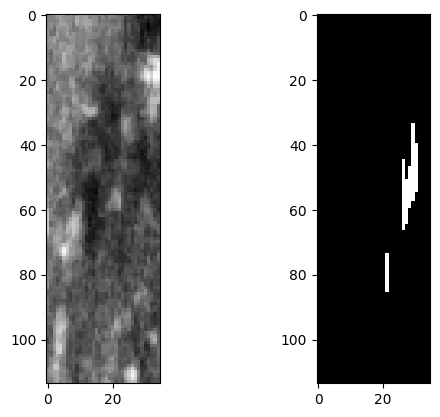

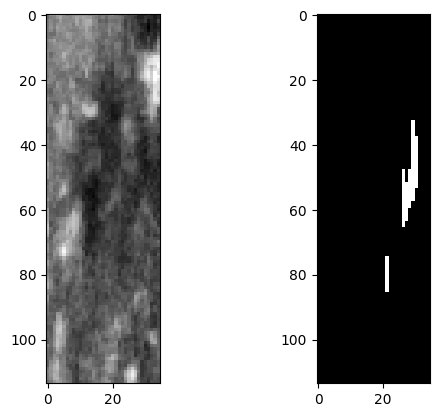

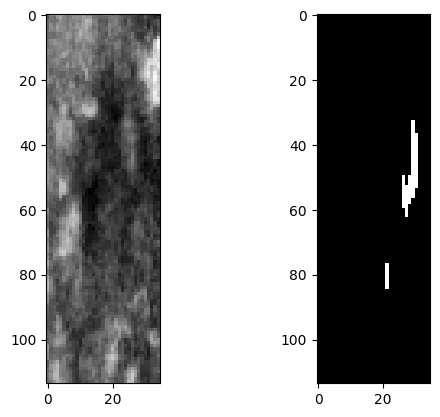

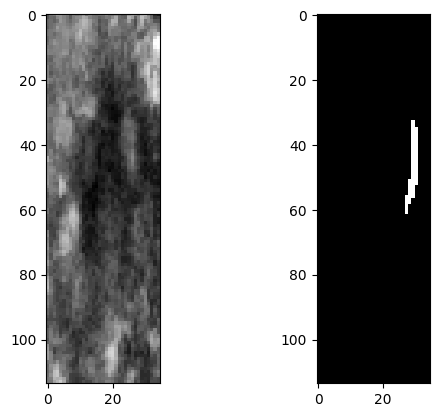

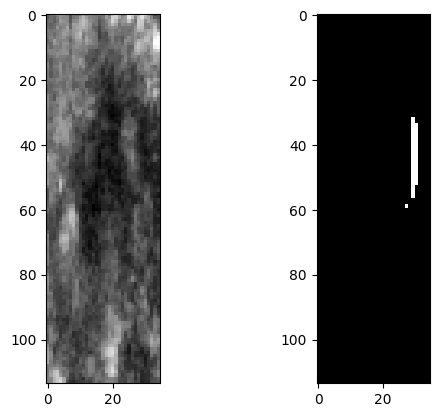

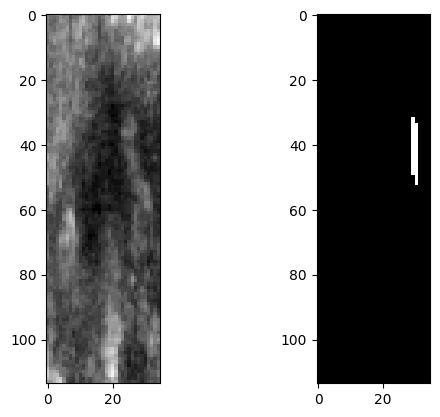

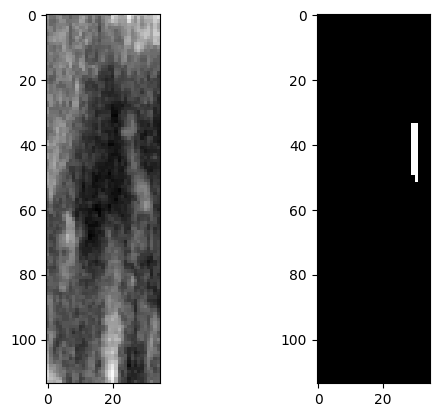

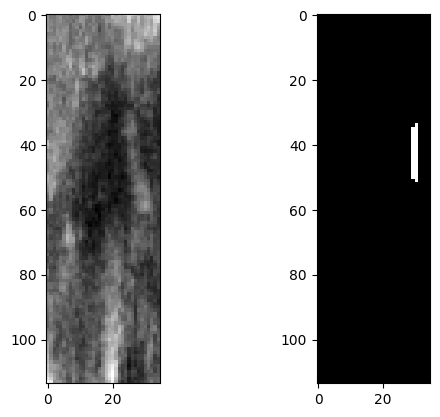

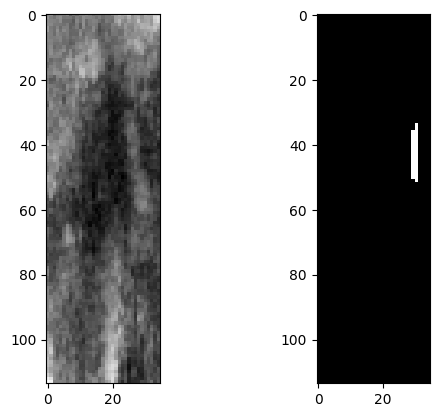

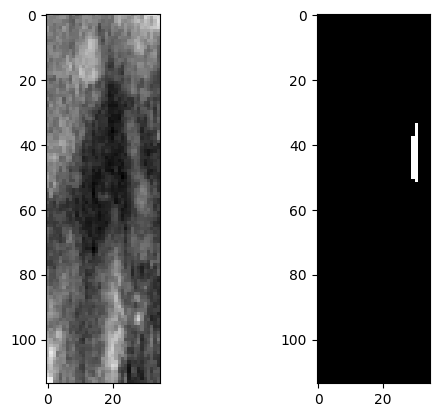

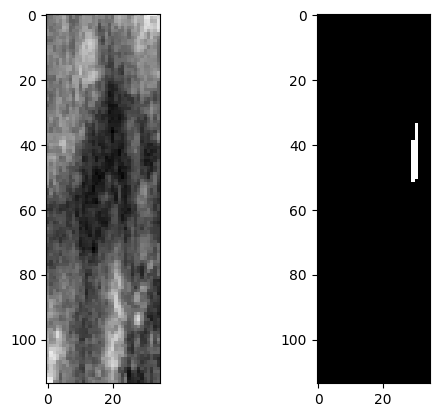

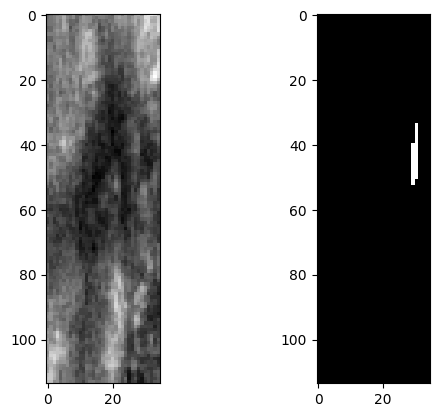

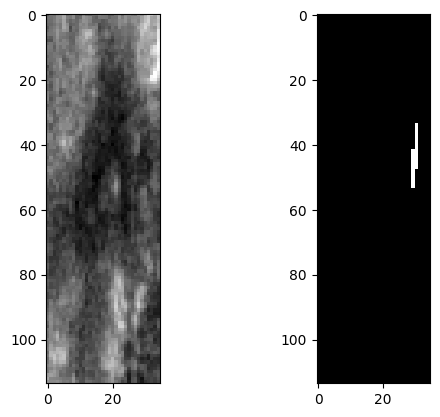

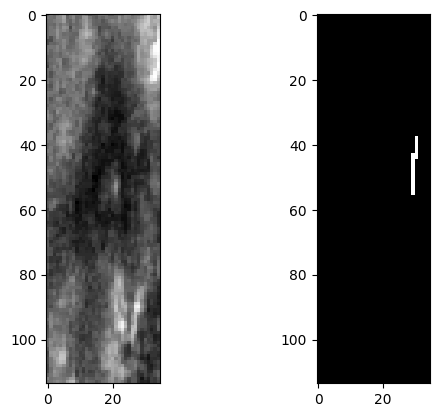

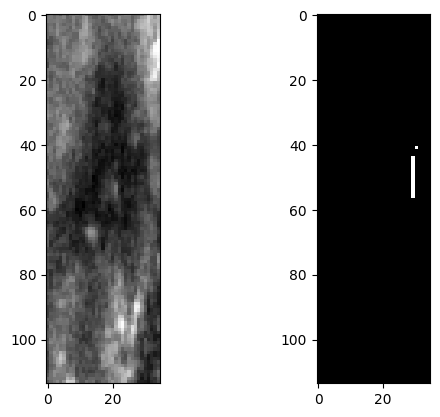

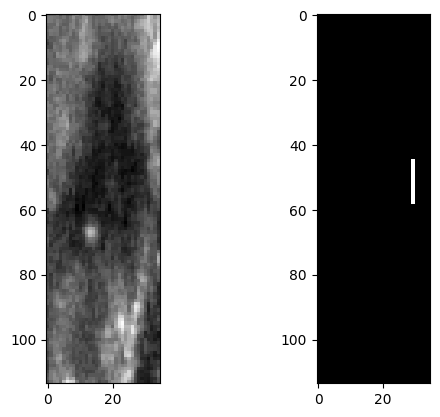

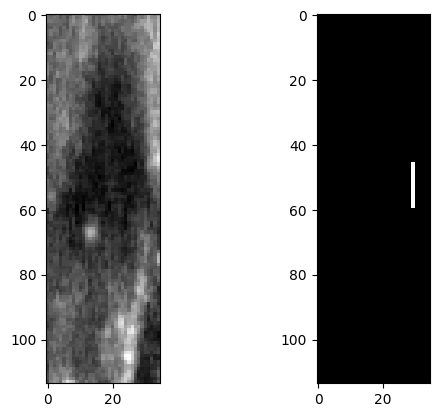

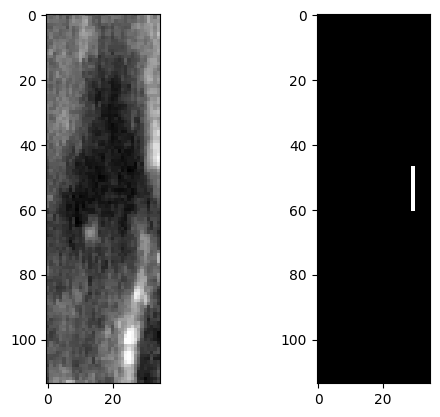

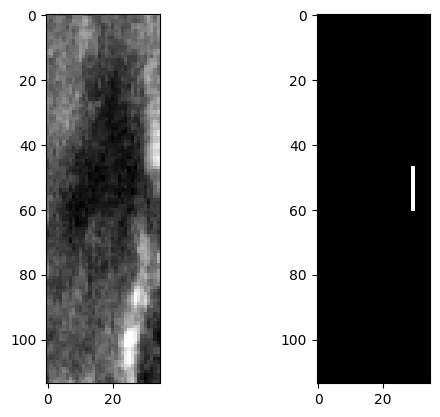

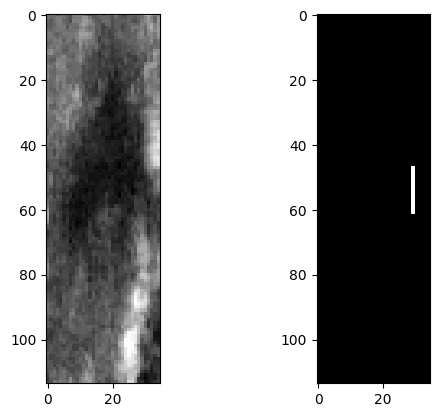

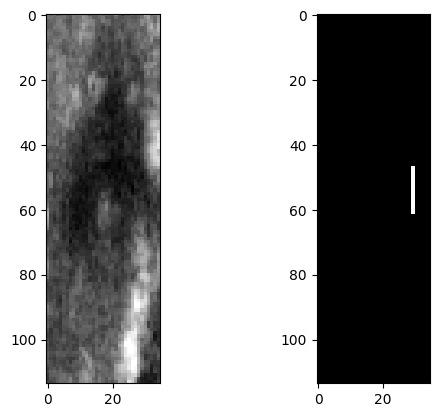

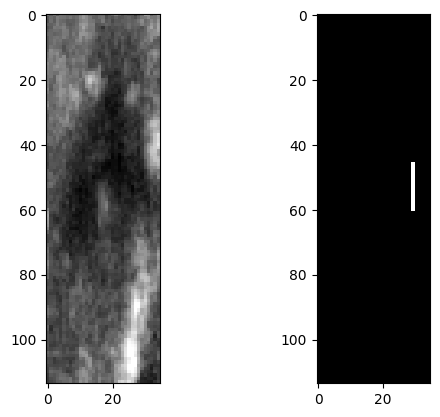

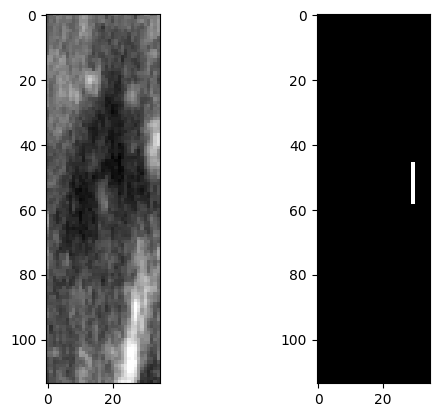

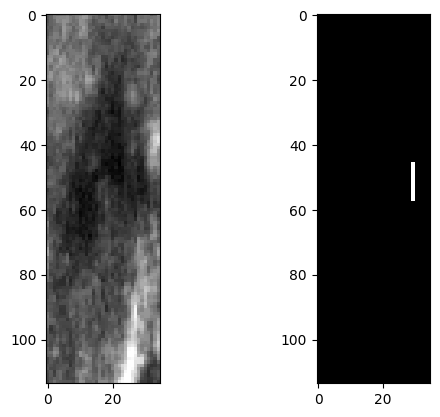

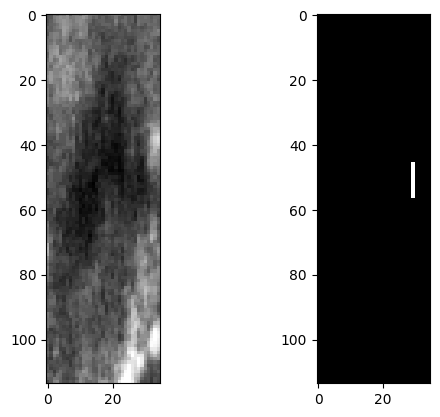

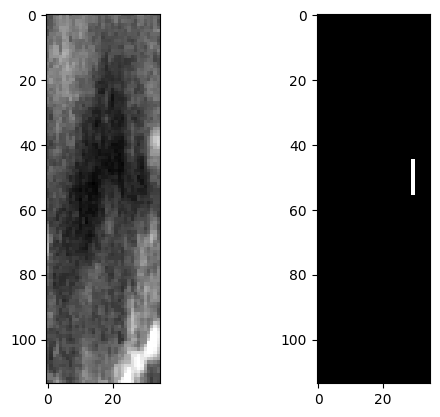

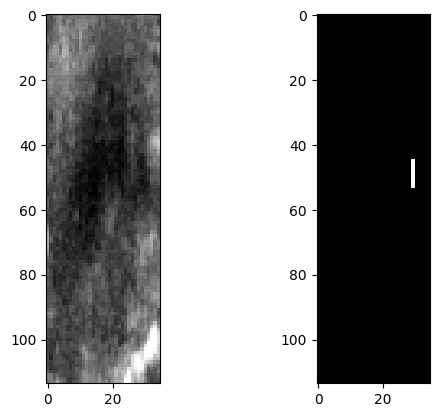

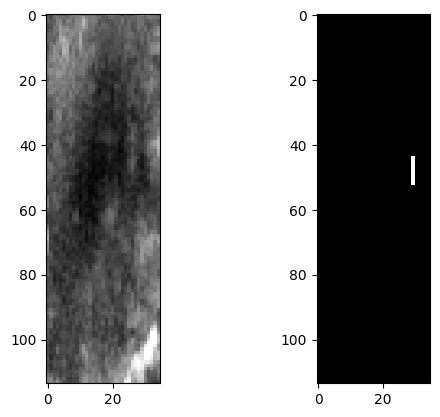

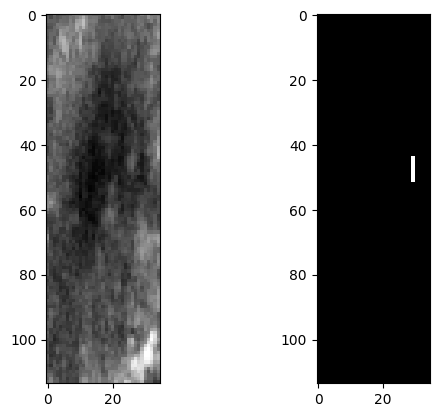

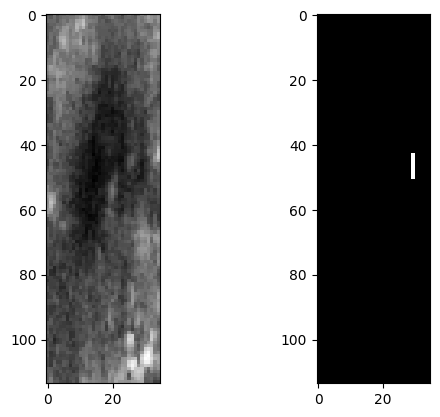

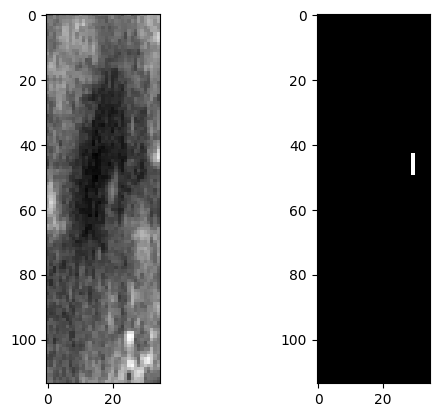

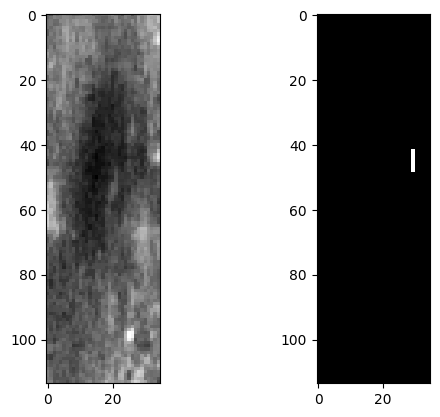

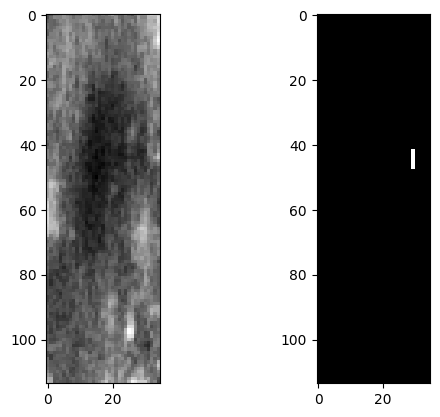

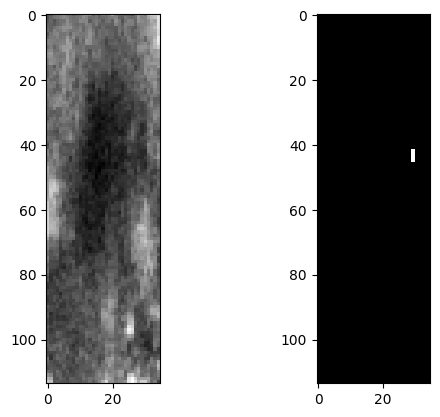

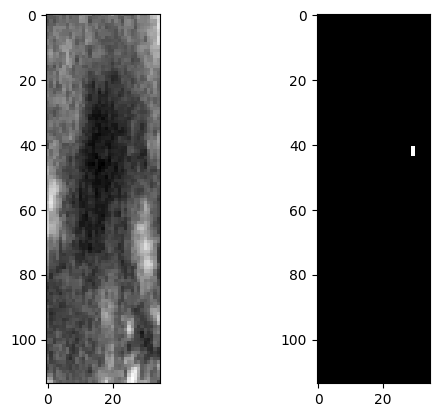

In [10]:
vol,mask,y = tdsc[0]

vol = np.transpose(vol, (1,0,2))
mask = np.transpose(mask, (1,0,2))
for idx in range(len(vol)):
    s = vol[idx]
    m = mask[idx]
    plt.subplot(1,2,1)
    plt.imshow(s, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(m, cmap='gray')
    plt.show()


In [ ]:
import cv2
import numpy as np

def get_document_corners(image):
    original_image = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours based on area and keep the largest one
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]

    document_contour = None
    for contour in contours:
        # Approximate the contour to a polygon (since the paper is a quadrilateral)
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)

        # If we find a contour with 4 points, we assume it's the document
        if len(approx) == 4:
            document_contour = approx
            break

    if document_contour is not None:
        # Draw the corners of the document (quadrilateral)
        for point in document_contour:
            cv2.circle(original_image, tuple(point[0]), 10, (0, 255, 0), -1)

    return original_image

# Open the webcam (default webcam index is 0)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Detect document corners in the current frame
    output_frame = get_document_corners(frame)

    # Display the frame with the detected corners
    cv2.imshow("Webcam Feed with Detected Corners", output_frame)

    # Exit if the user presses the 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()
